In [3]:
# Import all necessary librarues
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
df = pd.read_csv('D1_healthcare-dataset-stroke-data.csv')

In [18]:
# Understand the dataset
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5893 entries, 0 to 5892
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5893 non-null   int64  
 1   gender             5893 non-null   object 
 2   age                5893 non-null   float64
 3   hypertension       5893 non-null   int64  
 4   heart_disease      5893 non-null   int64  
 5   ever_married       5893 non-null   object 
 6   work_type          5893 non-null   object 
 7   Residence_type     5893 non-null   object 
 8   avg_glucose_level  5893 non-null   float64
 9   bmi                5552 non-null   float64
 10  smoking_status     5748 non-null   object 
 11  stroke             5893 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 552.6+ KB


In [20]:
# Check for missing values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  341
smoking_status       145
stroke                 0
dtype: int64

In [21]:
# We can see that there are 261 missing values in the 'bmi' column
# Dealing with missing values
# Fill the missing values in the 'bmi' column with the mean value

mean_bmi = df['bmi'].mean()
df['bmi'].fillna(mean_bmi, inplace=True)

df['smoking_status'].fillna('Unknown', inplace=True)

In [22]:
# Check Null values again.
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [23]:
# Encoding categorical variables into Numerical values

df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)


In [24]:
df.head()

id   age  hypertension  heart_disease  avg_glucose_level        bmi  \
0   9046  67.0             0              1             228.69  36.600000   
1  51676  61.0             0              0             202.21  29.006142   
2  31112  80.0             0              1             105.92  32.500000   
3  60182  49.0             0              0             171.23  34.400000   
4   1665  79.0             1              0             174.12  24.000000   

   stroke  gender_Male  gender_Other  ever_married_Yes  \
0       1            1             0                 1   
1       1            0             0                 1   
2       1            1             0                 1   
3       1            0             0                 1   
4       1            0             0                 1   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                       0                  1                        0   
1                       0                  0                        1   
2                       0                  1                        0   
3                       0                  1                        0   
4                       0                  0                        1   

   work_type_children  Residence_type_Urban  smoking_status_formerly smoked  \
0                   0                     1                               1   
1                   0                     0                               0   
2                   0                     0                               0   
3                   0                     1                               0   
4                   0                     0                               0   

   smoking_status_never smoked  smoking_status_smokes  
0                            0                      0  
1                            1                      0  
2                            1                      0  
3                            0                      1  
4                            1                      0

<Axes: xlabel='stroke', ylabel='count'>

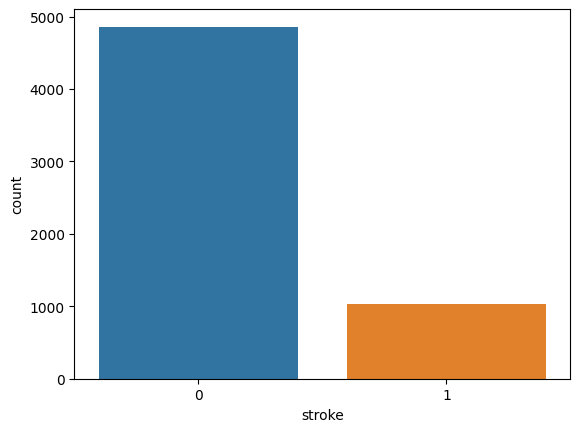

In [25]:
# Plot Target variable distribution in Seaborn

import seaborn as sns

sns.countplot(x='stroke', data=df)

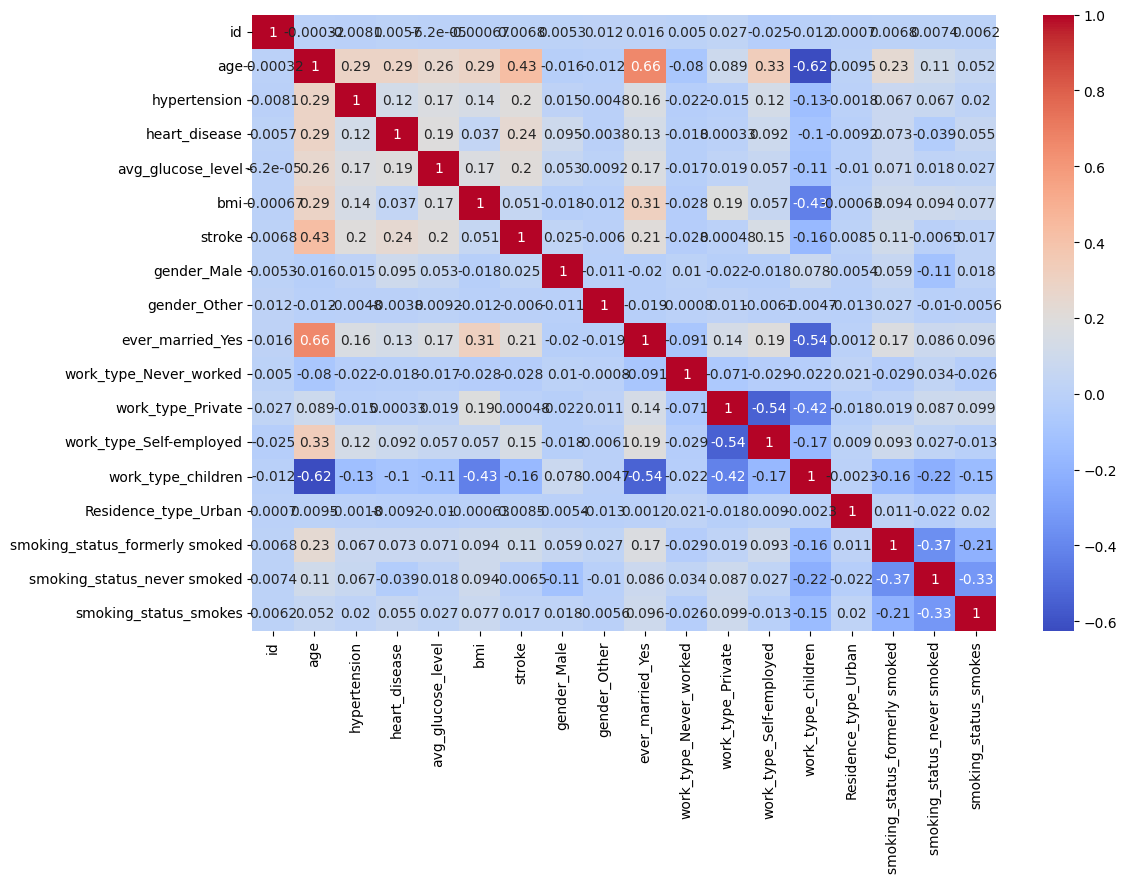

In [26]:
# Dataset is highly imbalanced with only a small fraction of the samples having a stroke.
# Correlation Matrix

corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [27]:
df.head()

id   age  hypertension  heart_disease  avg_glucose_level        bmi  \
0   9046  67.0             0              1             228.69  36.600000   
1  51676  61.0             0              0             202.21  29.006142   
2  31112  80.0             0              1             105.92  32.500000   
3  60182  49.0             0              0             171.23  34.400000   
4   1665  79.0             1              0             174.12  24.000000   

   stroke  gender_Male  gender_Other  ever_married_Yes  \
0       1            1             0                 1   
1       1            0             0                 1   
2       1            1             0                 1   
3       1            0             0                 1   
4       1            0             0                 1   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                       0                  1                        0   
1                       0                  0                        1   
2                       0                  1                        0   
3                       0                  1                        0   
4                       0                  0                        1   

   work_type_children  Residence_type_Urban  smoking_status_formerly smoked  \
0                   0                     1                               1   
1                   0                     0                               0   
2                   0                     0                               0   
3                   0                     1                               0   
4                   0                     0                               0   

   smoking_status_never smoked  smoking_status_smokes  
0                            0                      0  
1                            1                      0  
2                            1                      0  
3                            0                      1  
4                            1                      0

In [28]:
print(df.columns)


Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')


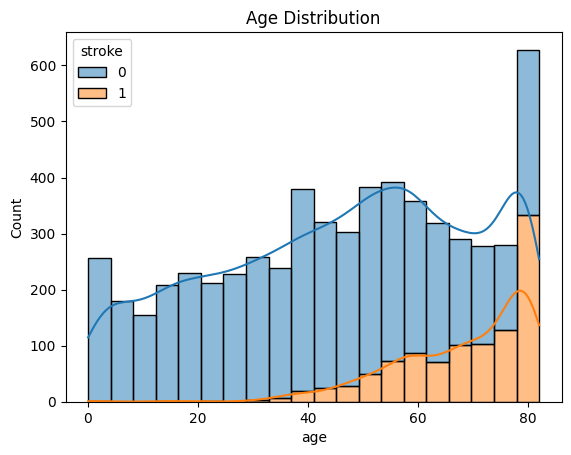

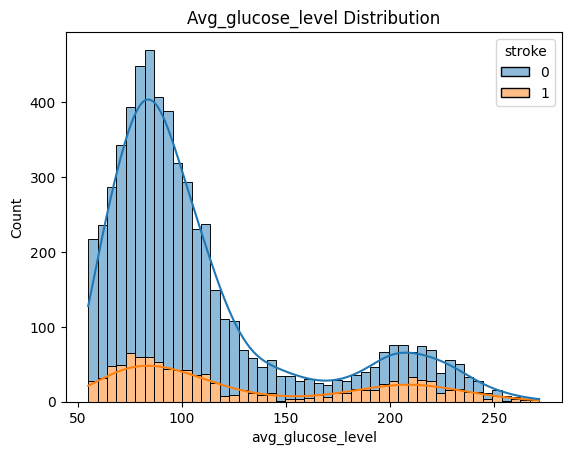

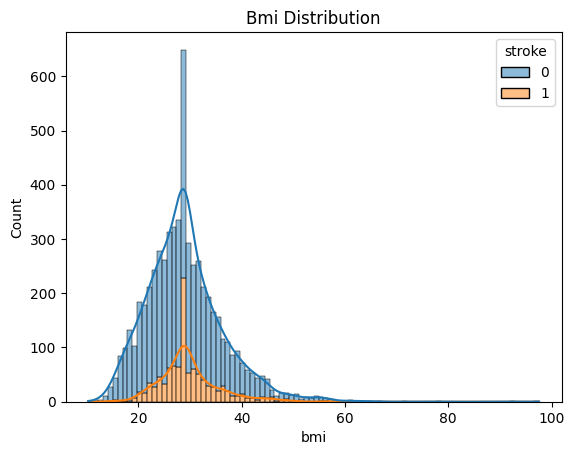

In [29]:
# Plot Individual Histogram for the numerical features

num_features = ['age', 'avg_glucose_level', 'bmi']
for feature in num_features:
    plt.figure()
    sns.histplot(data=df, x=feature, hue='stroke', kde=True, multiple='stack')
    plt.title(feature.capitalize() + ' Distribution')
    plt.show()

In [30]:
df.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

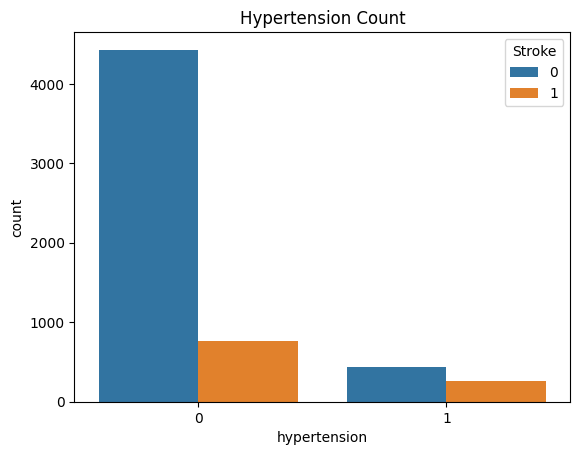

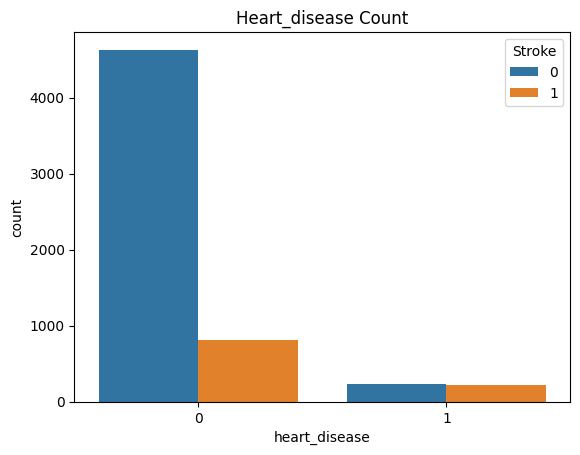

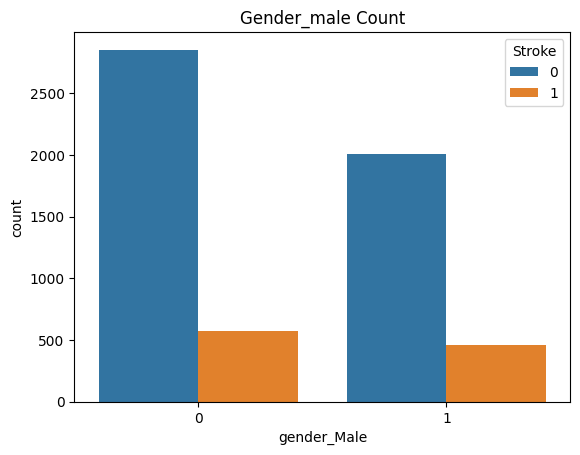

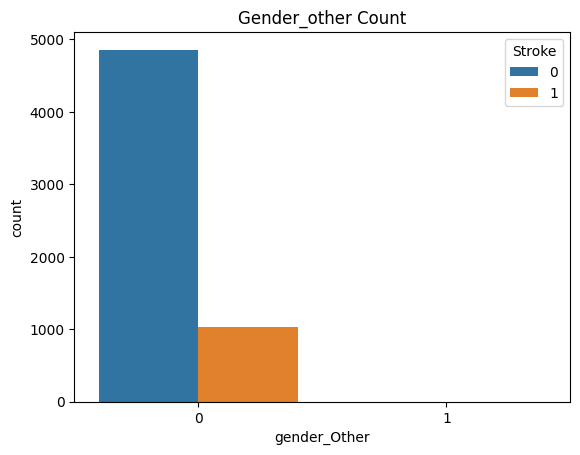

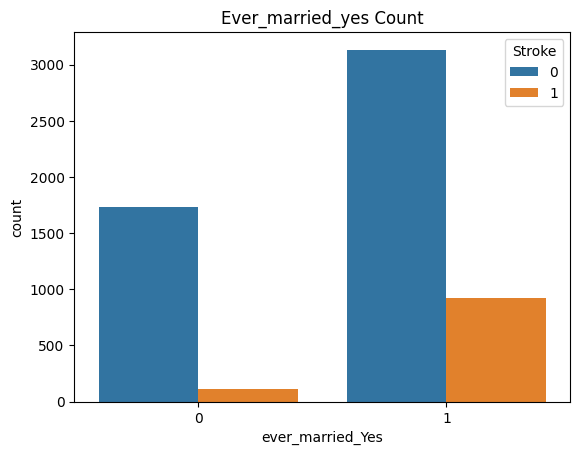

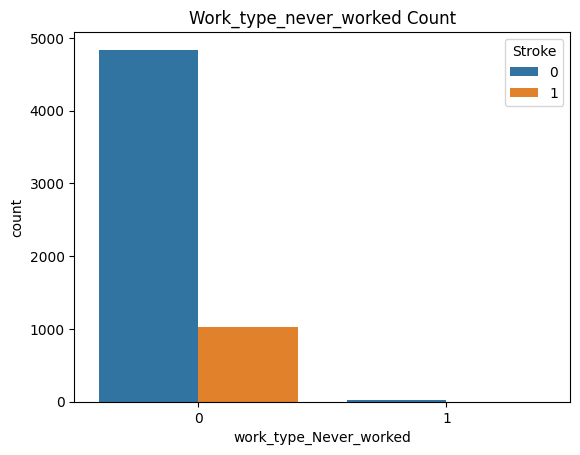

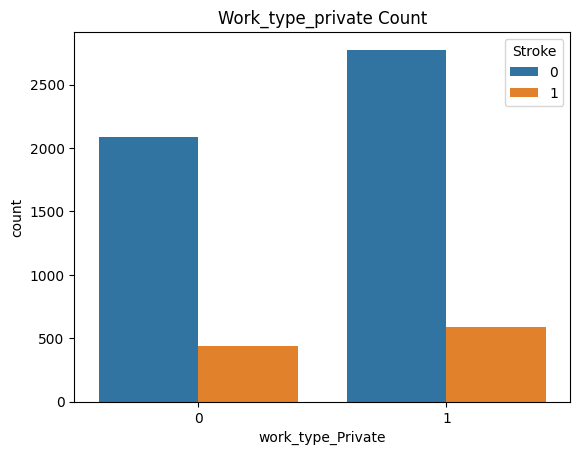

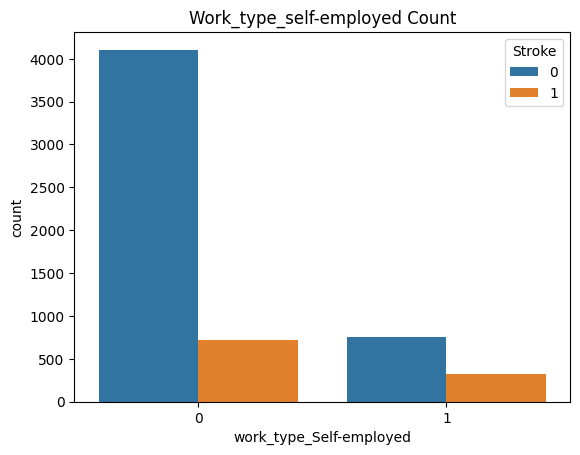

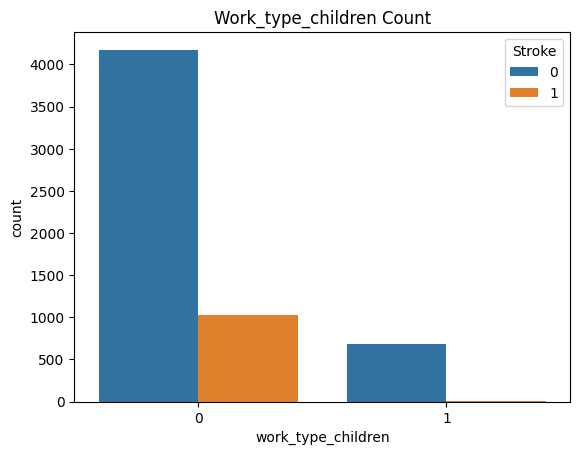

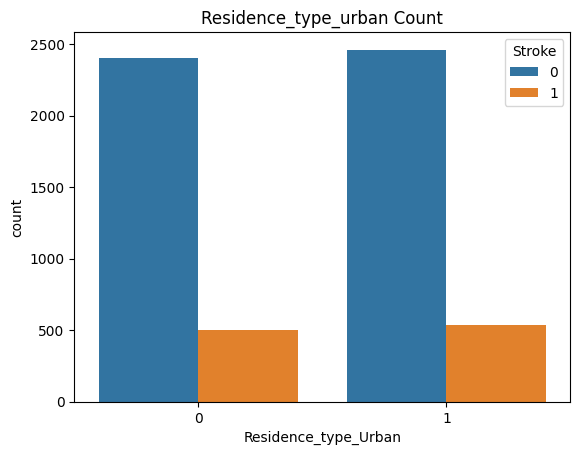

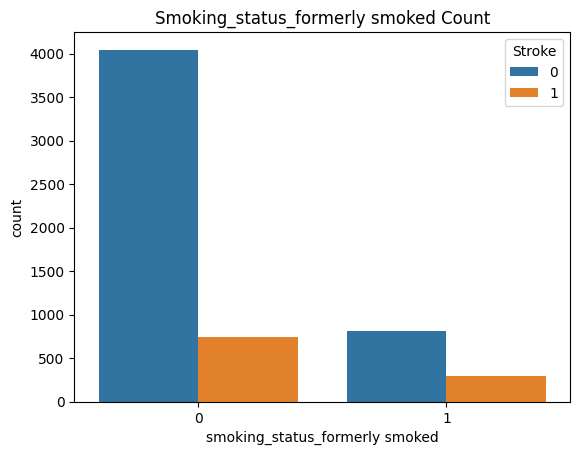

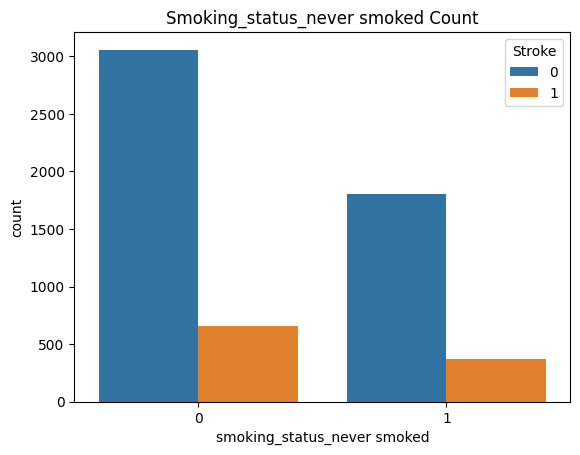

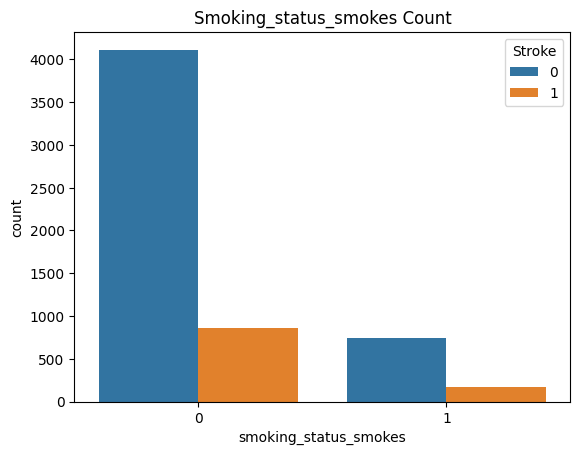

In [31]:
# Plot individual bar charts for categorical features
import seaborn as sns

#cat_features = ['gender_Male','gender_Other', 'hypertension', 'heart_disease', 'ever_married_1', 'work_type_1',	'work_type_2',	
#                'work_type_3',	'work_type_4',	'Residence_type_1',	'smoking_status_1',	'smoking_status_2',	'smoking_status_3' ]

cat_features = ['hypertension', 'heart_disease','gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes']
for feature in cat_features:
    plt.figure()
    sns.countplot(data=df, x=feature, hue='stroke')
    plt.title(feature.capitalize() + ' Count')
    plt.legend(title='Stroke', loc='upper right')
    plt.show()

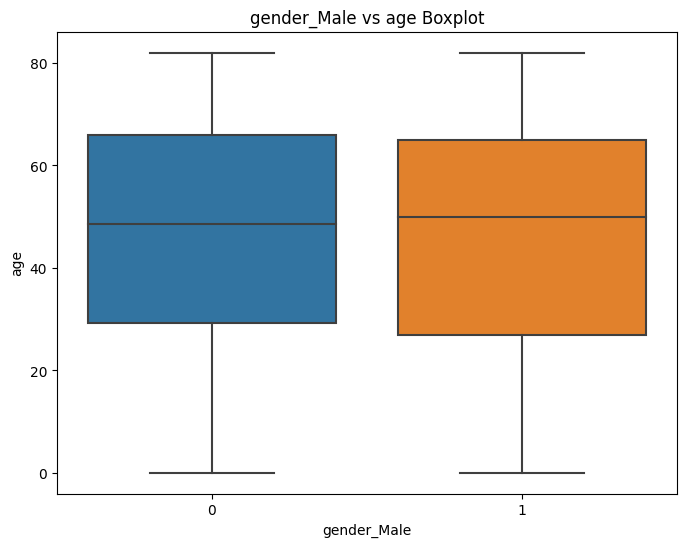

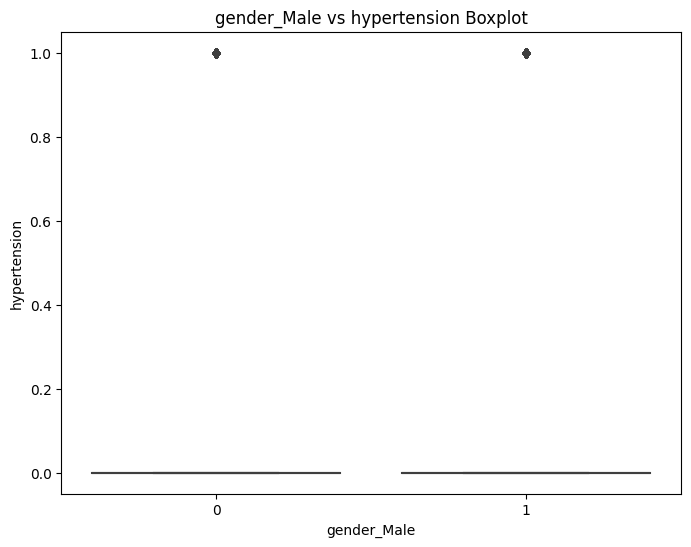

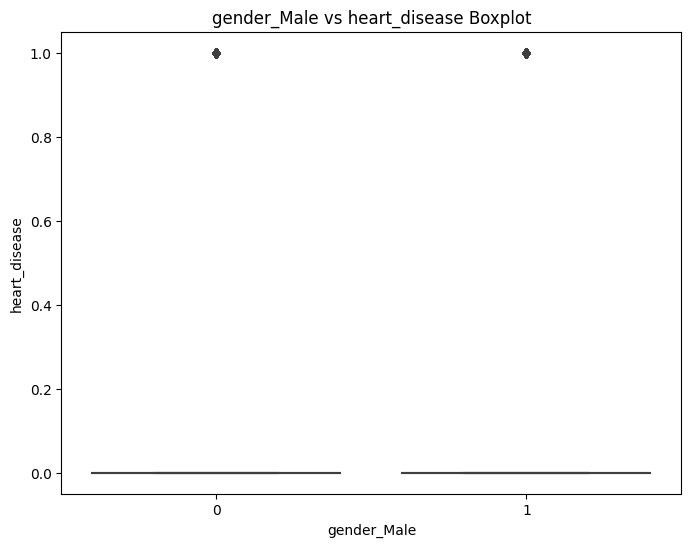

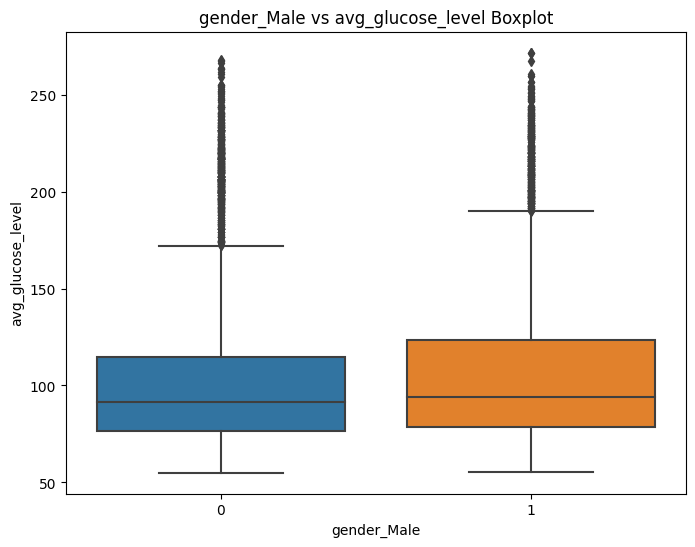

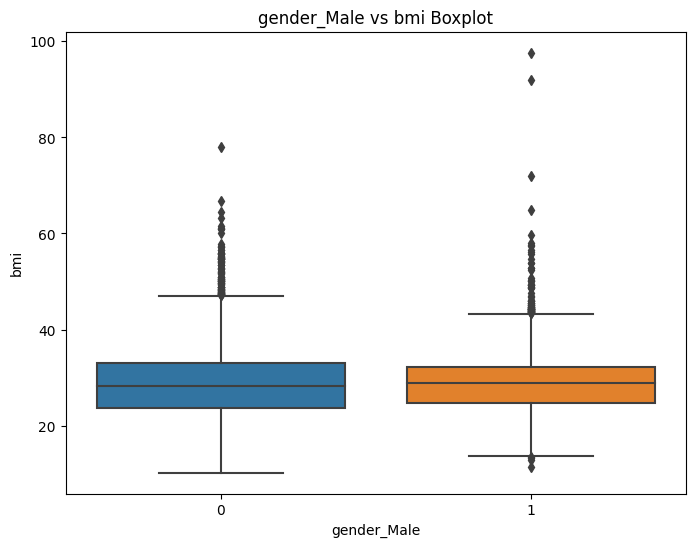

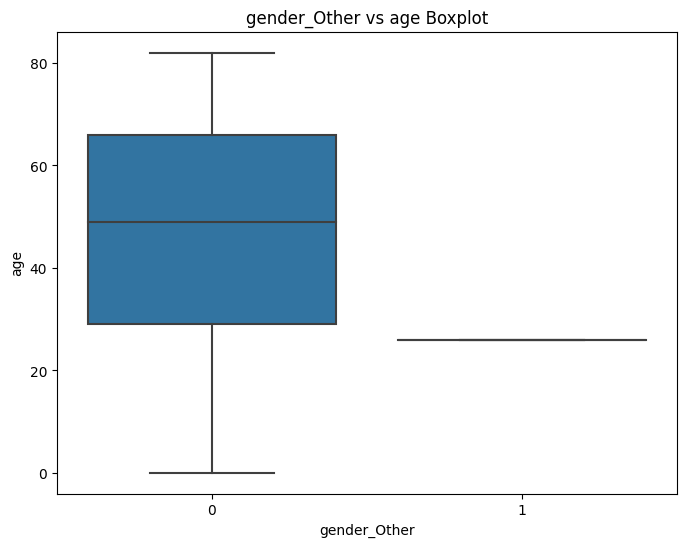

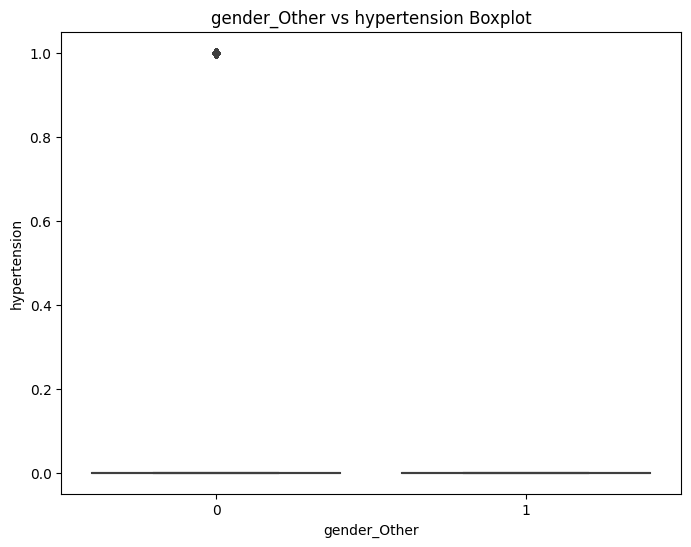

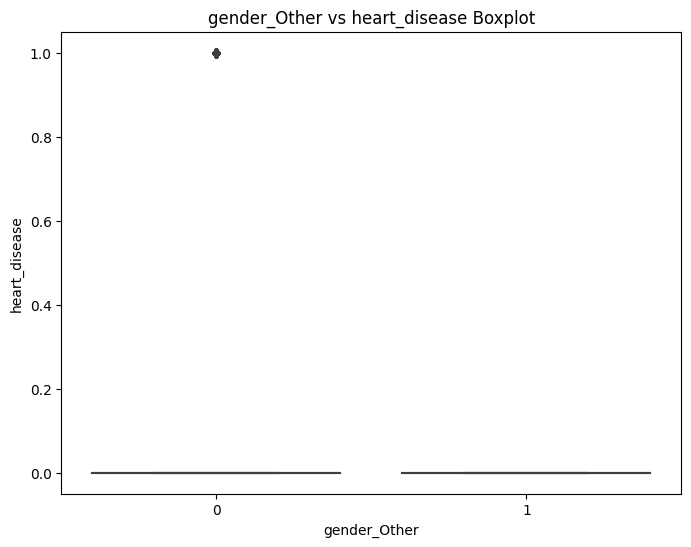

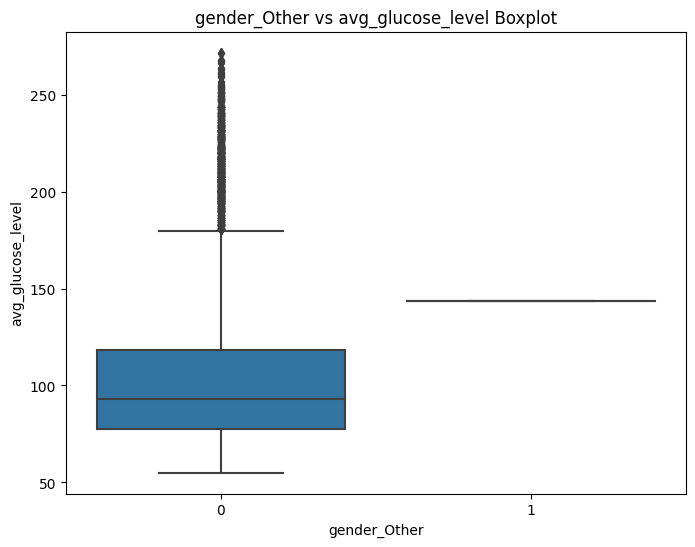

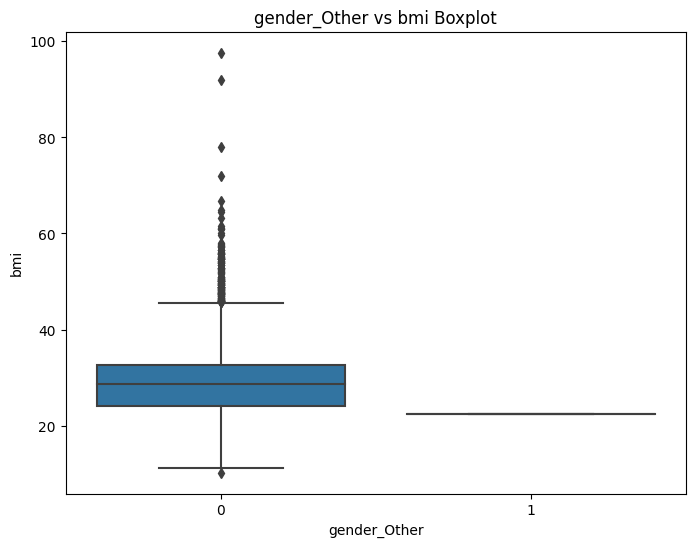

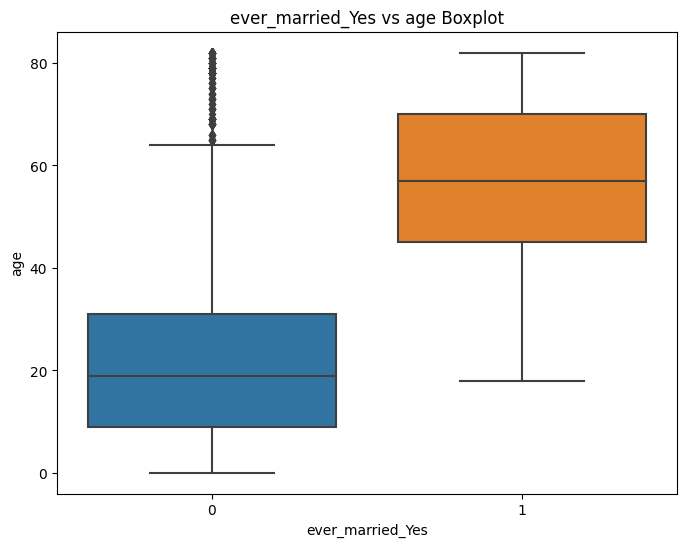

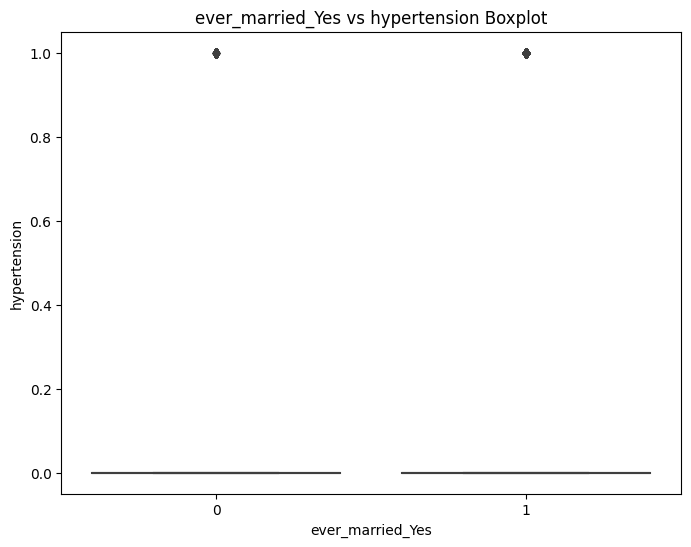

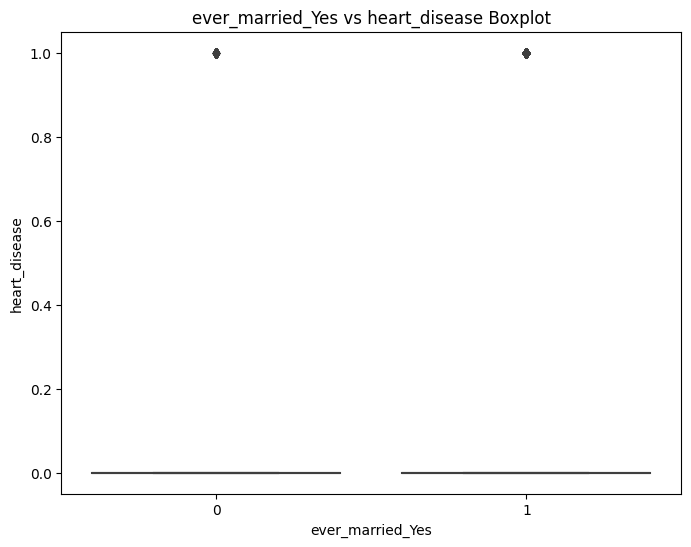

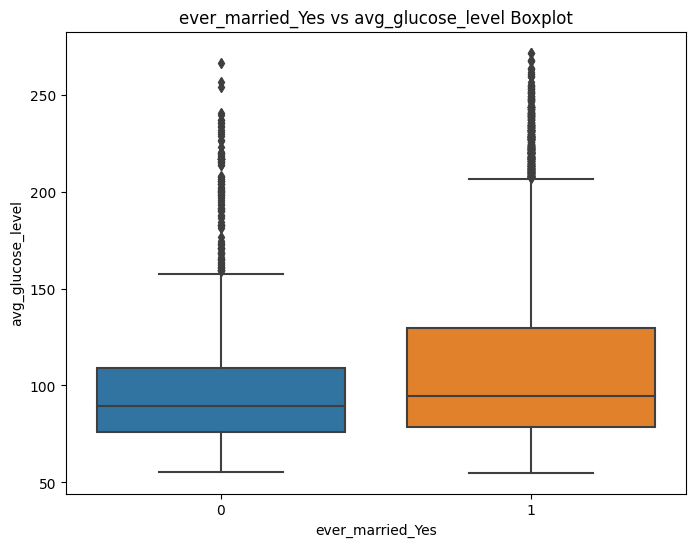

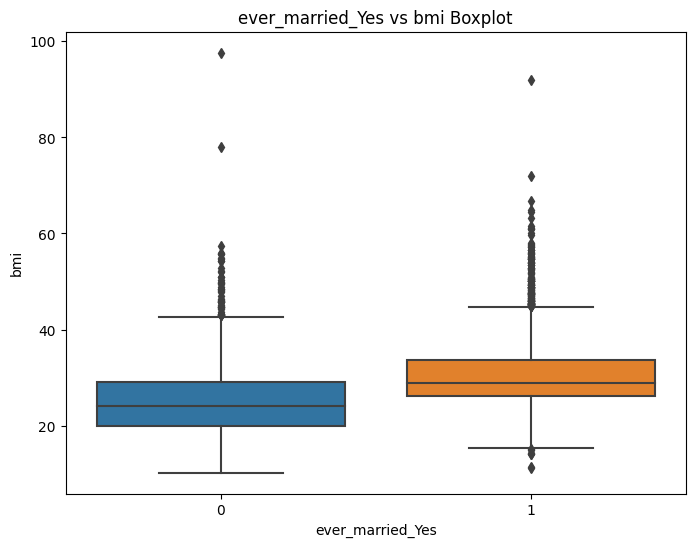

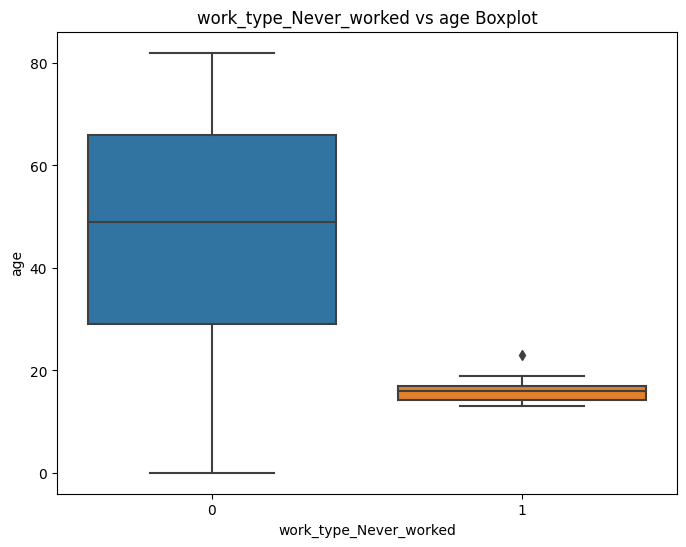

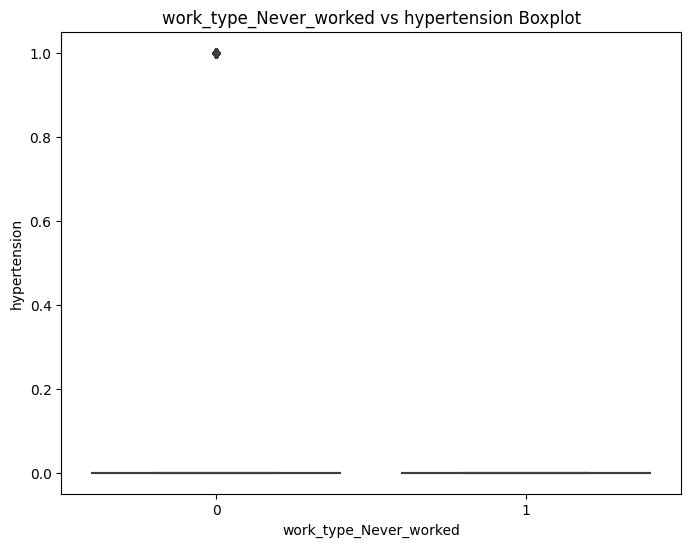

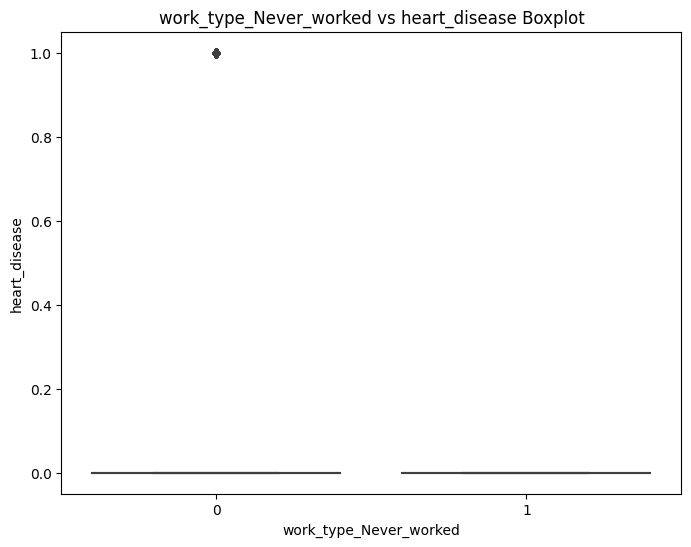

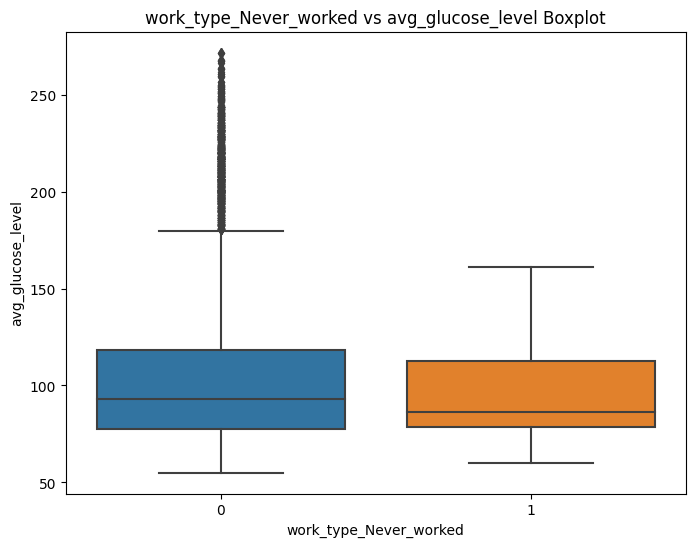

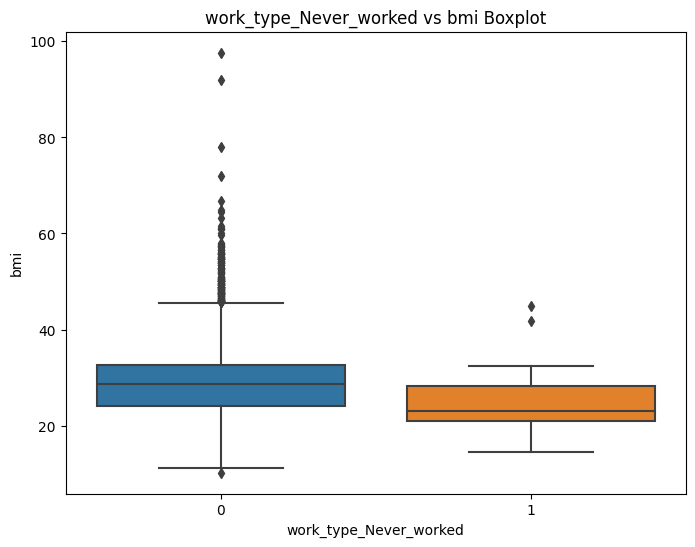

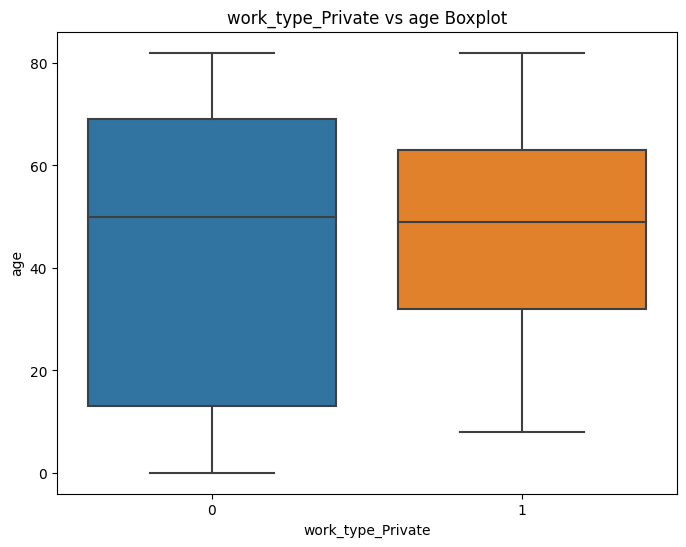

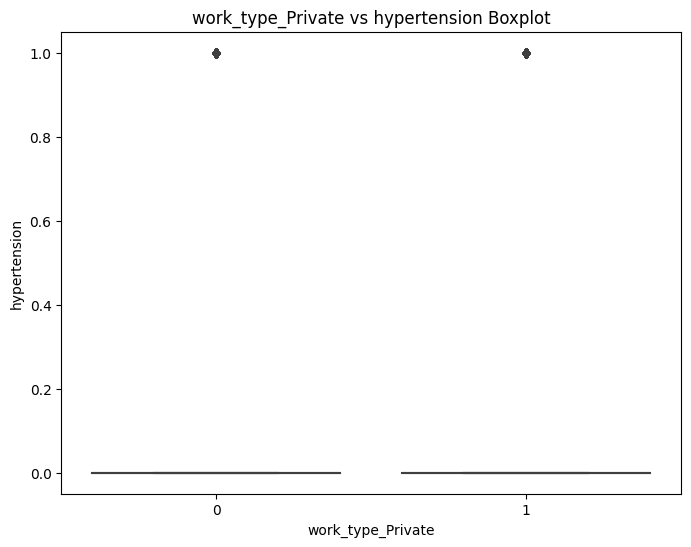

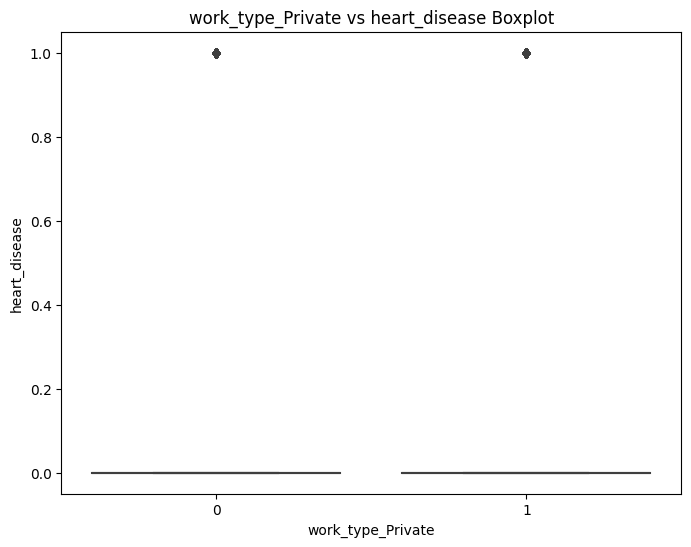

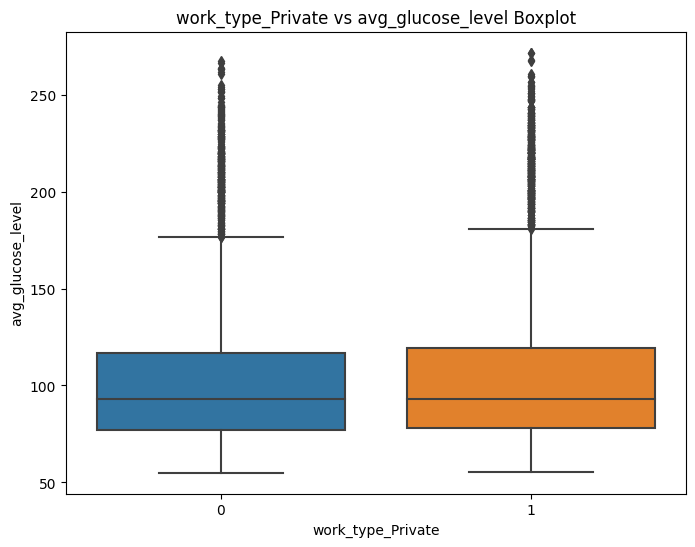

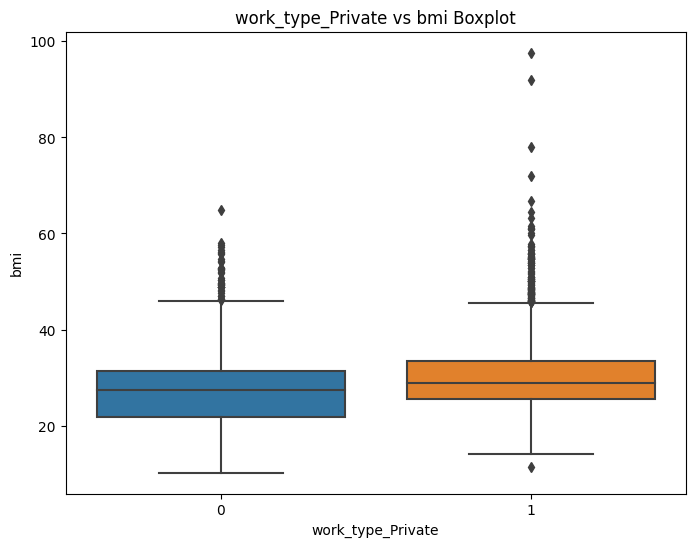

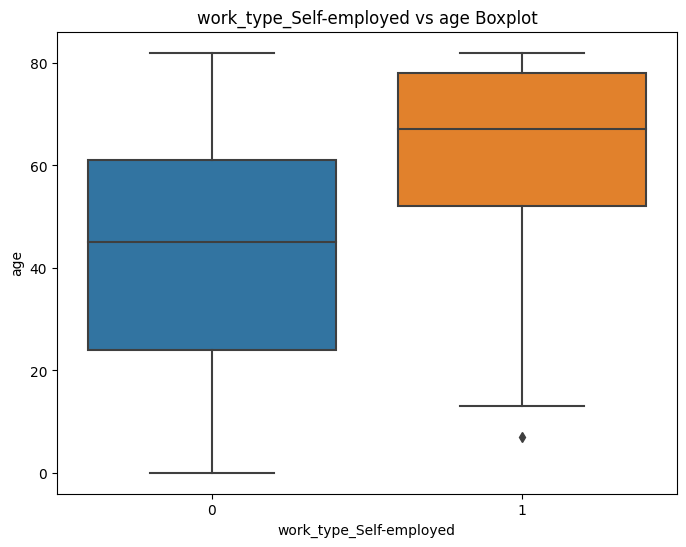

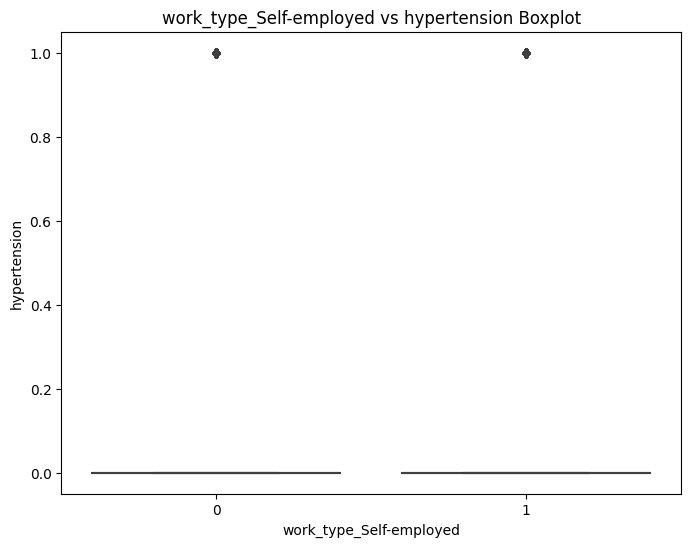

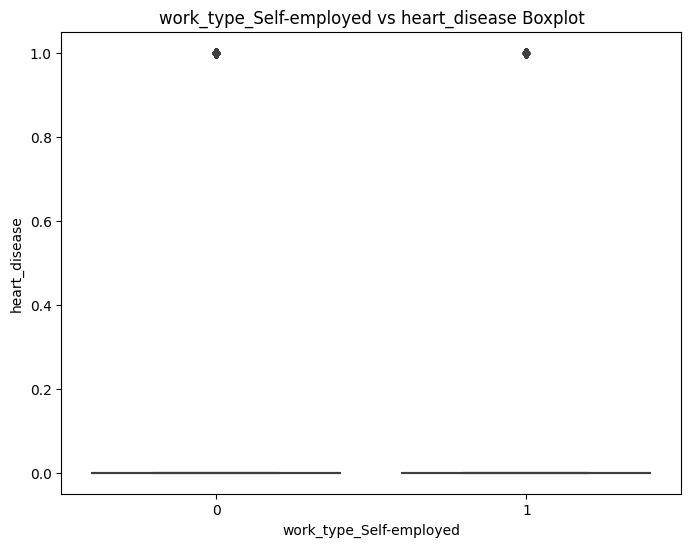

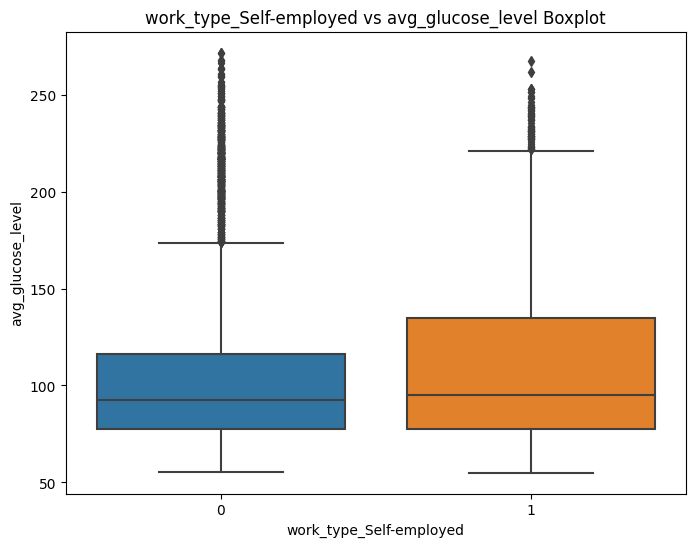

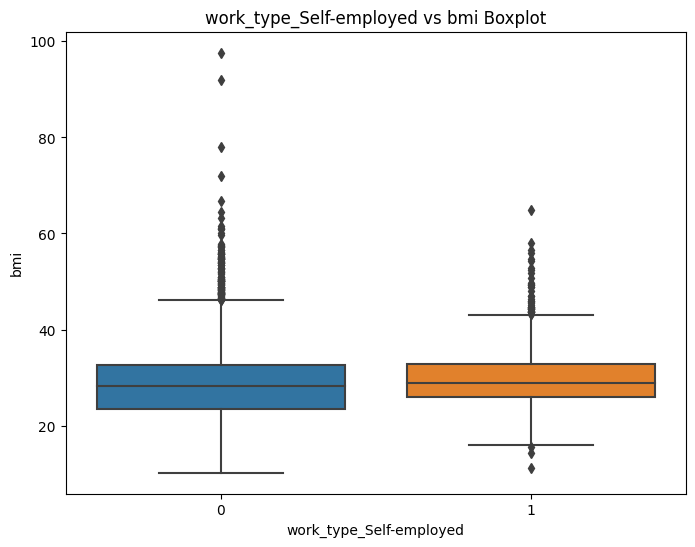

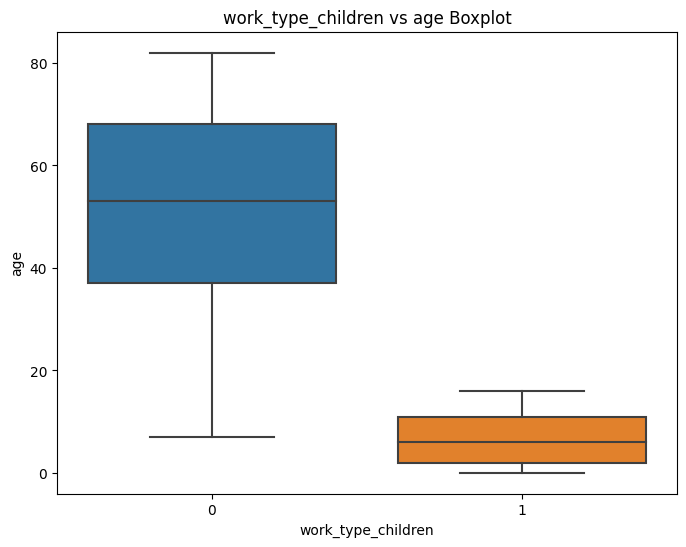

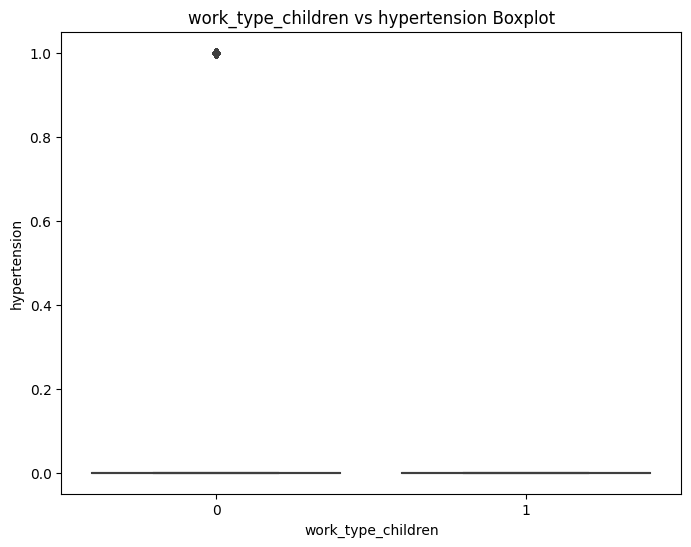

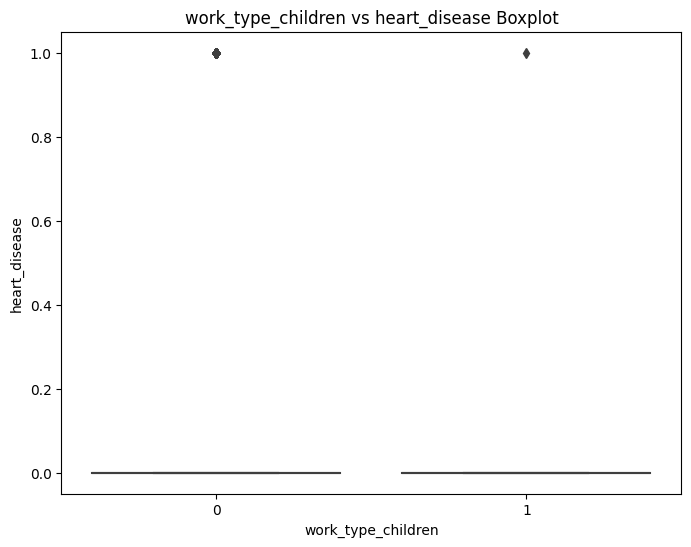

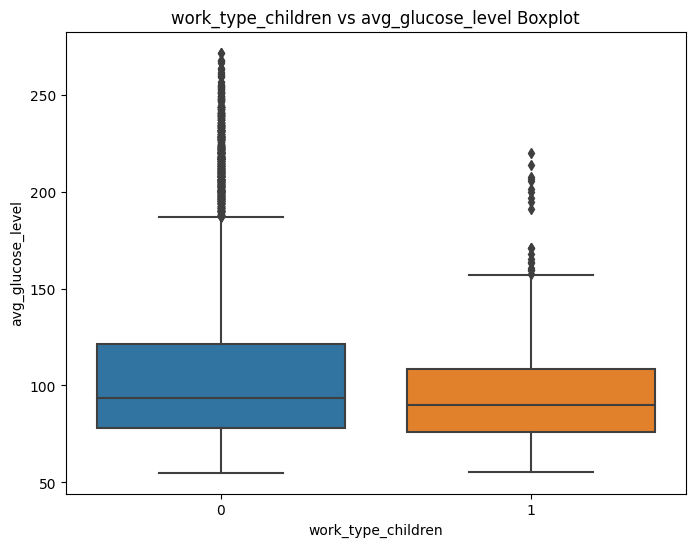

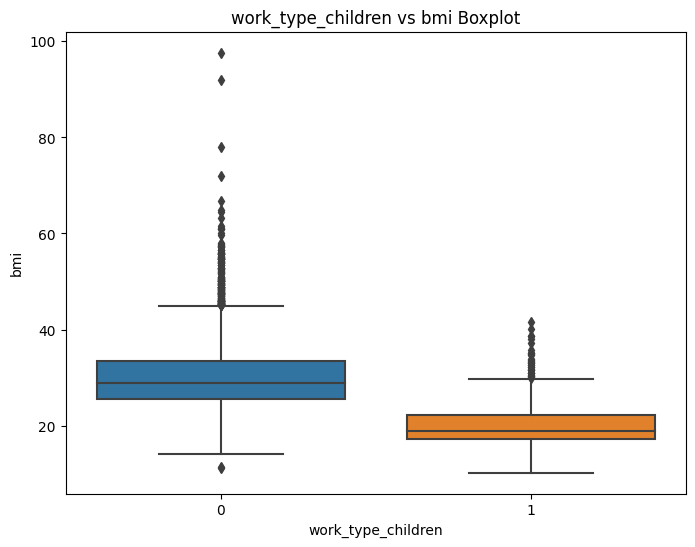

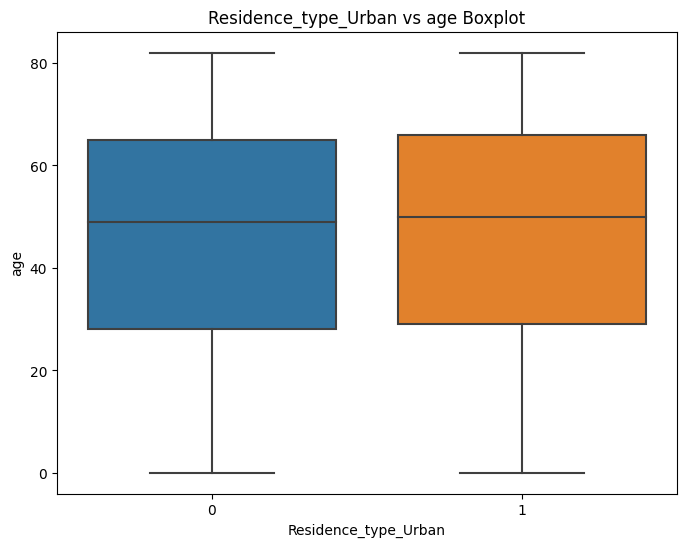

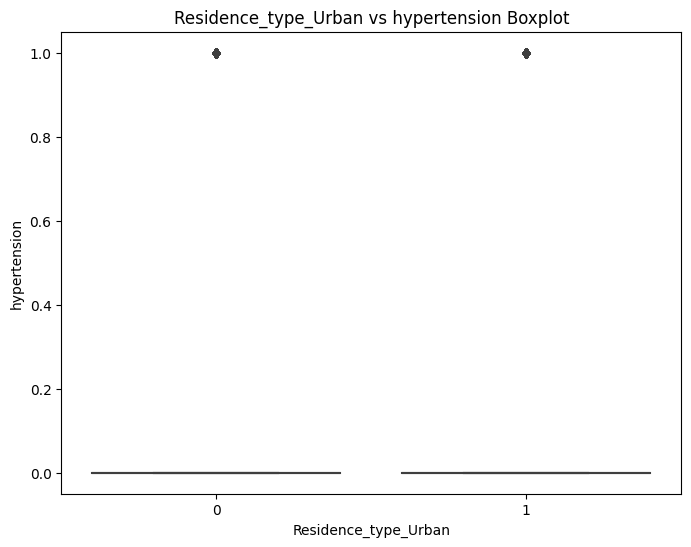

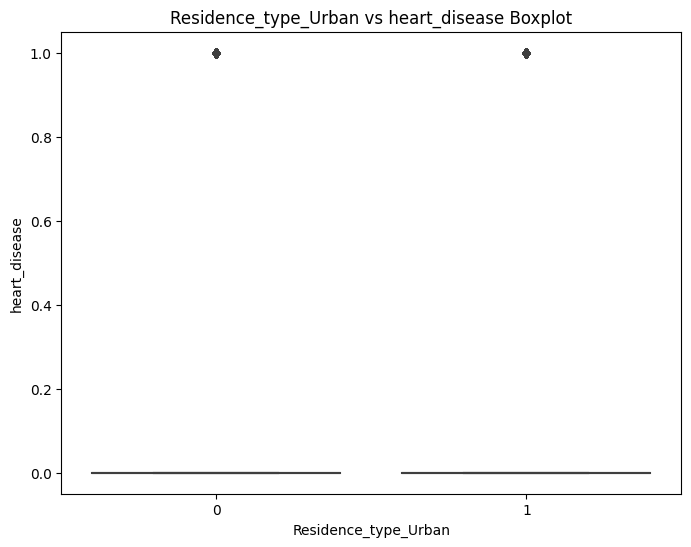

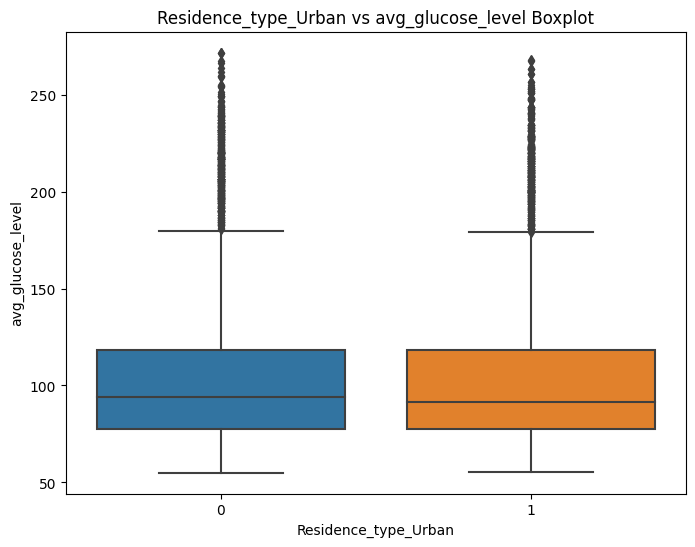

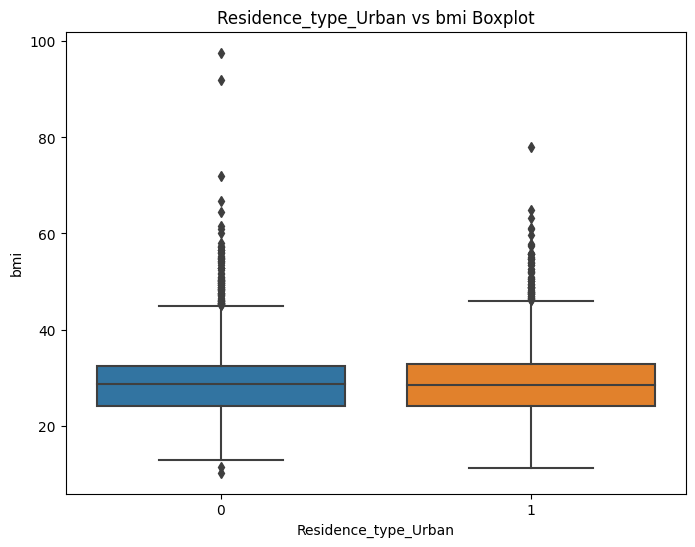

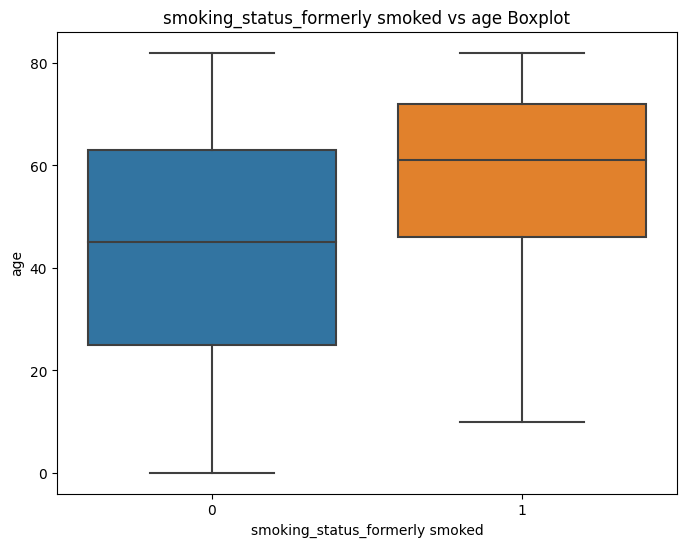

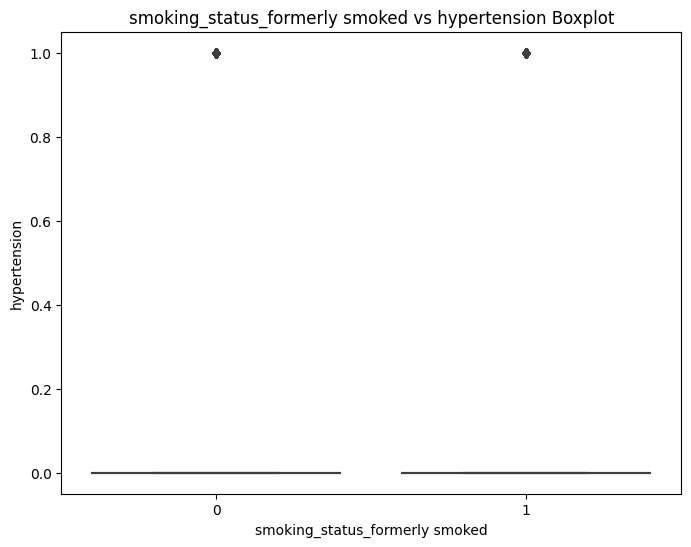

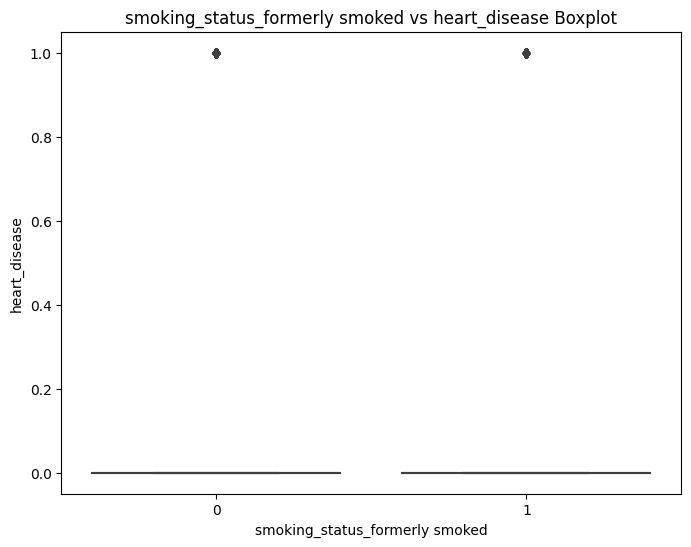

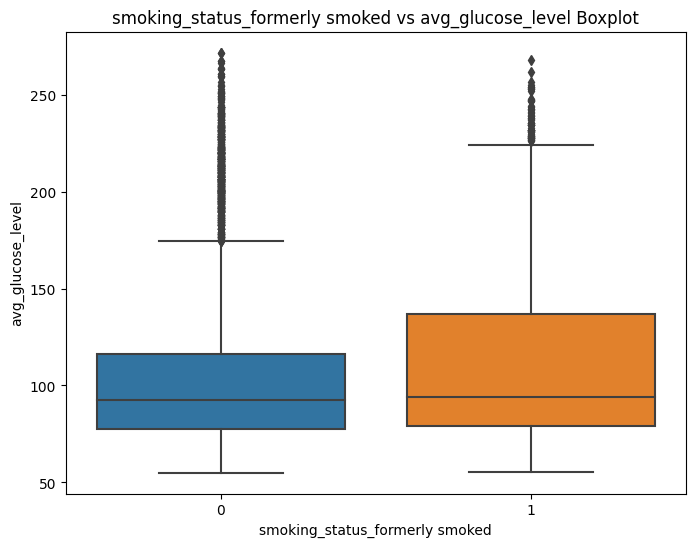

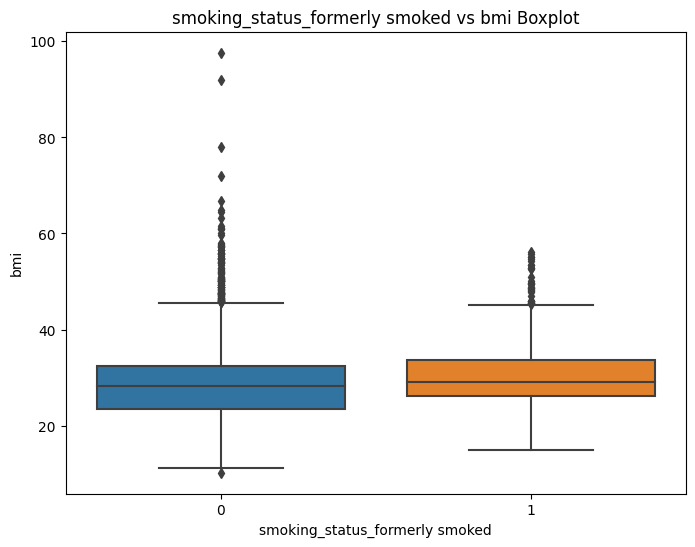

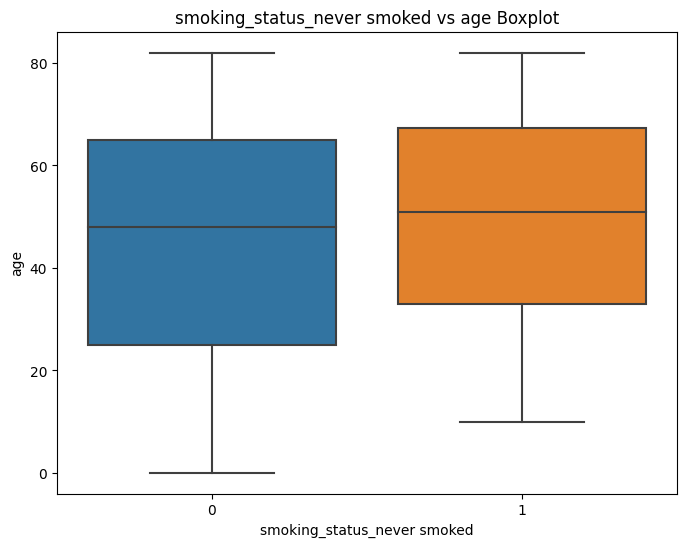

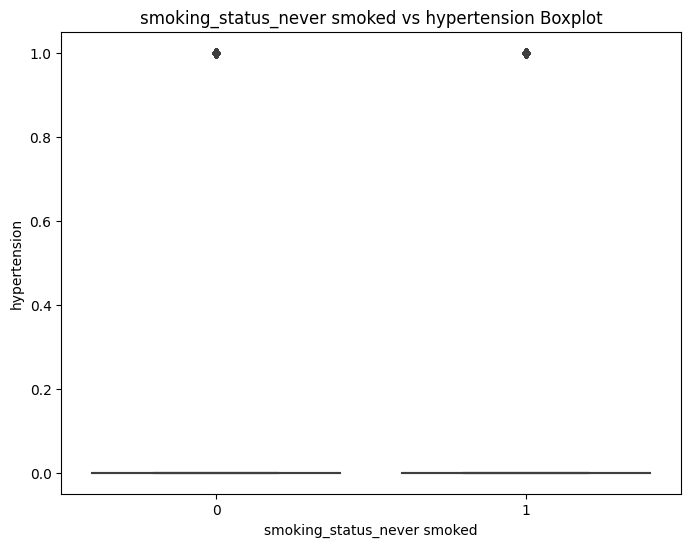

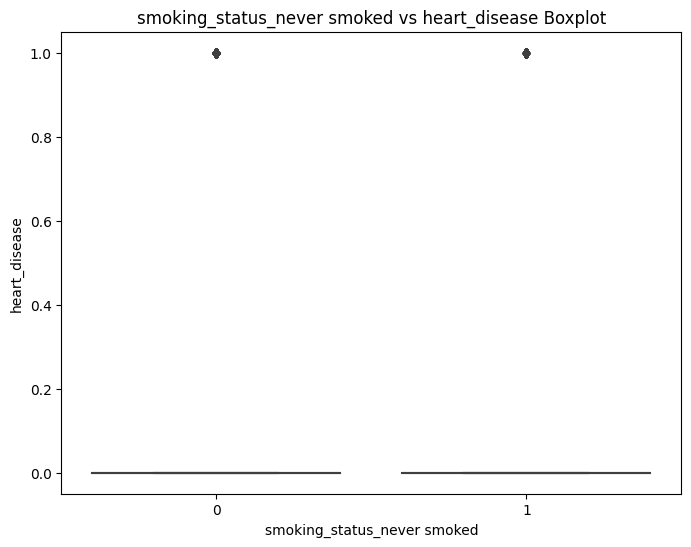

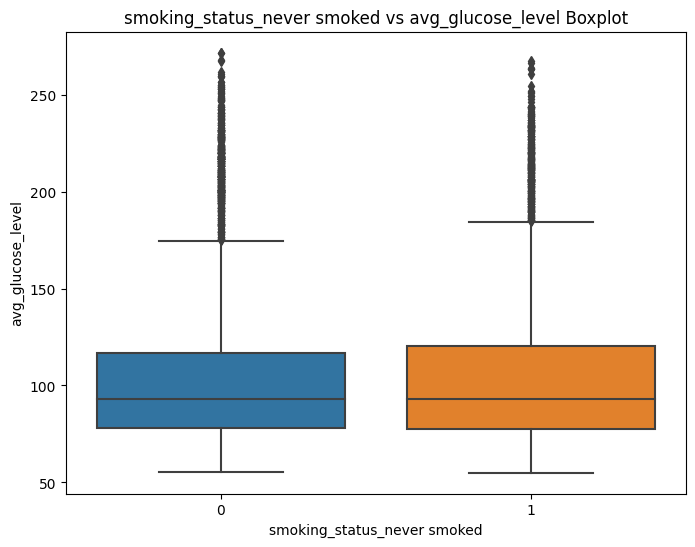

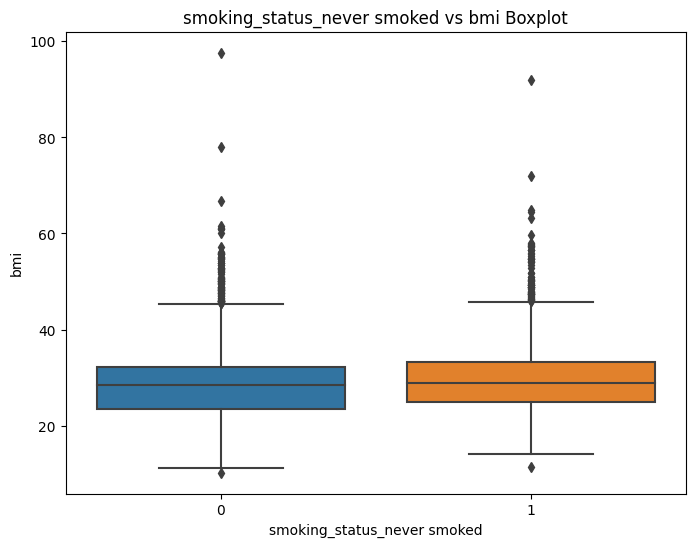

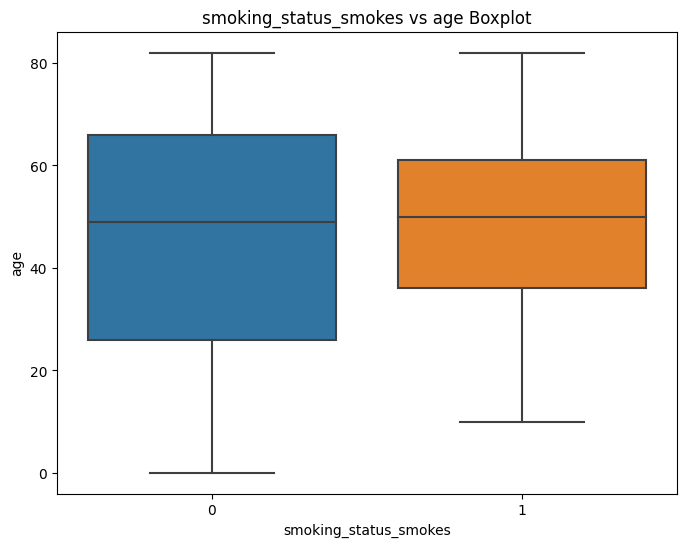

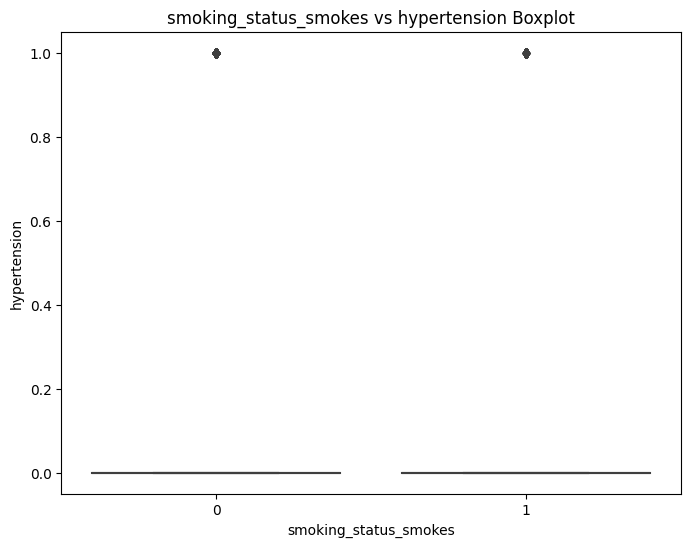

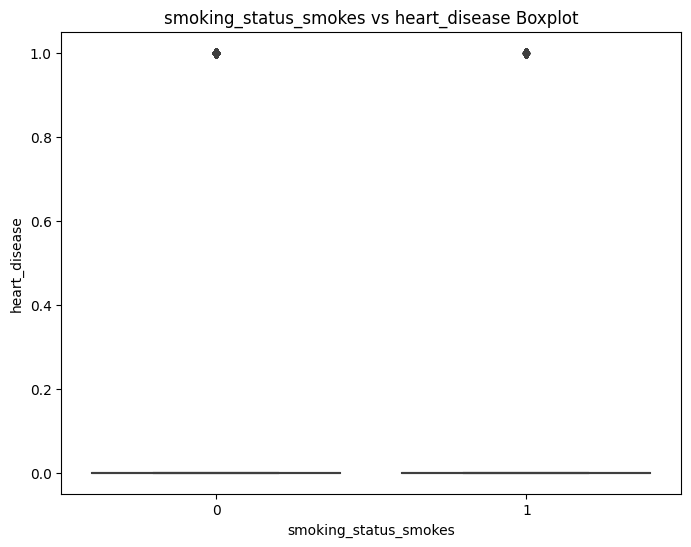

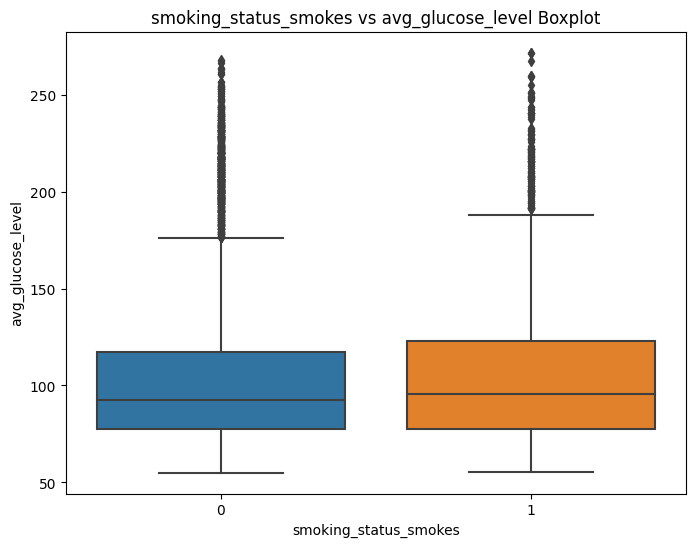

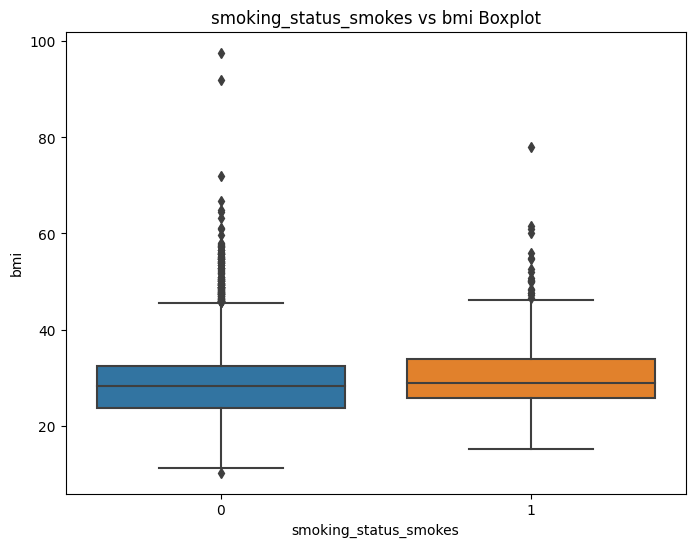

In [32]:



# Define the categorical and numerical features
categorical_features = ['gender_Male', 'gender_Other', 'ever_married_Yes', 'work_type_Never_worked',
                        'work_type_Private', 'work_type_Self-employed', 'work_type_children',
                        'Residence_type_Urban', 'smoking_status_formerly smoked',
                        'smoking_status_never smoked', 'smoking_status_smokes']

numerical_features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

# Plot boxplots for categorical vs numerical features
for cat_feature in categorical_features:
    for num_feature in numerical_features:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df, x=cat_feature, y=num_feature)
        plt.title(f'{cat_feature} vs {num_feature} Boxplot')
        plt.show()


In [33]:
from sklearn.preprocessing import MinMaxScaler

# Apply normalization and standardization for numerical features

num_features = ['age', 'avg_glucose_level', 'bmi']

# Apply Min-Max scaling (normalization) to numerical features
scaler_minmax = MinMaxScaler()
df[num_features] = scaler_minmax.fit_transform(df[num_features])
print('\n\n Data after Min-Max scaling:\n\n')
df.head()



 Data after Min-Max scaling:




id       age  hypertension  heart_disease  avg_glucose_level       bmi  \
0   9046  0.816895             0              1           0.801366  0.301260   
1  51676  0.743652             0              0           0.679186  0.214274   
2  31112  0.975586             0              1           0.234901  0.254296   
3  60182  0.597168             0              0           0.536243  0.276060   
4   1665  0.963379             1              0           0.549578  0.156930   

   stroke  gender_Male  gender_Other  ever_married_Yes  \
0       1            1             0                 1   
1       1            0             0                 1   
2       1            1             0                 1   
3       1            0             0                 1   
4       1            0             0                 1   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                       0                  1                        0   
1                       0                  0                        1   
2                       0                  1                        0   
3                       0                  1                        0   
4                       0                  0                        1   

   work_type_children  Residence_type_Urban  smoking_status_formerly smoked  \
0                   0                     1                               1   
1                   0                     0                               0   
2                   0                     0                               0   
3                   0                     1                               0   
4                   0                     0                               0   

   smoking_status_never smoked  smoking_status_smokes  
0                            0                      0  
1                            1                      0  
2                            1                      0  
3                            0                      1  
4                            1                      0

In [34]:
from sklearn.preprocessing import  StandardScaler

num_features = ['age', 'avg_glucose_level', 'bmi']


# Apply z-score standardization to numerical features
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])
print('\n\n Data after z-score standardization:\n\n') 
df.head()



 Data after z-score standardization:




id       age  hypertension  heart_disease  avg_glucose_level  \
0   9046  0.884708             0              1           2.482412   
1  51676  0.625297             0              0           1.932005   
2  31112  1.446765             0              1          -0.069455   
3  60182  0.106475             0              0           1.288062   
4   1665  1.403529             1              0           1.348133   

            bmi  stroke  gender_Male  gender_Other  ever_married_Yes  \
0  1.016106e+00       1            1             0                 1   
1 -9.726624e-16       1            0             0                 1   
2  4.675000e-01       1            1             0                 1   
3  7.217319e-01       1            0             0                 1   
4 -6.698531e-01       1            0             0                 1   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                       0                  1                        0   
1                       0                  0                        1   
2                       0                  1                        0   
3                       0                  1                        0   
4                       0                  0                        1   

   work_type_children  Residence_type_Urban  smoking_status_formerly smoked  \
0                   0                     1                               1   
1                   0                     0                               0   
2                   0                     0                               0   
3                   0                     1                               0   
4                   0                     0                               0   

   smoking_status_never smoked  smoking_status_smokes  
0                            0                      0  
1                            1                      0  
2                            1                      0  
3                            0                      1  
4                            1                      0

In [35]:
# Drop 'id' column if it exists

df.drop('id', axis=1, inplace=True, errors='ignore')

In [36]:
df.head()

age  hypertension  heart_disease  avg_glucose_level           bmi  \
0  0.884708             0              1           2.482412  1.016106e+00   
1  0.625297             0              0           1.932005 -9.726624e-16   
2  1.446765             0              1          -0.069455  4.675000e-01   
3  0.106475             0              0           1.288062  7.217319e-01   
4  1.403529             1              0           1.348133 -6.698531e-01   

   stroke  gender_Male  gender_Other  ever_married_Yes  \
0       1            1             0                 1   
1       1            0             0                 1   
2       1            1             0                 1   
3       1            0             0                 1   
4       1            0             0                 1   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                       0                  1                        0   
1                       0                  0                        1   
2                       0                  1                        0   
3                       0                  1                        0   
4                       0                  0                        1   

   work_type_children  Residence_type_Urban  smoking_status_formerly smoked  \
0                   0                     1                               1   
1                   0                     0                               0   
2                   0                     0                               0   
3                   0                     1                               0   
4                   0                     0                               0   

   smoking_status_never smoked  smoking_status_smokes  
0                            0                      0  
1                            1                      0  
2                            1                      0  
3                            0                      1  
4                            1                      0

In [37]:
# Apply Balancing technique ( SMOTE/ Oversampling / Undersampling ) in this dataset

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Convert categorical features to numerical using LabelEncoder
categorical_cols = ['gender_Male', 'gender_Other', 'ever_married_Yes', 'work_type_Never_worked',
                        'work_type_Private', 'work_type_Self-employed', 'work_type_children',
                        'Residence_type_Urban', 'smoking_status_formerly smoked',
                        'smoking_status_never smoked', 'smoking_status_smokes']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Check the class distribution
print(df['stroke'].value_counts())

# Split the dataset into X and y
X = df.drop(['stroke'], axis=1)
y = df['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Random Over Sampling technique
# ros = RandomOverSampler(random_state=42)
# X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
# print('\n\nAfter Random Over Sampling:\n\n', y_resampled.value_counts())

# # Apply Random Under Sampling technique
# rus = RandomUnderSampler(random_state=42)
# X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
# print('\n\nAfter Random Under Sampling:\n\n', y_resampled.value_counts())

# Apply SMOTE technique
smt = SMOTETomek(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)
print('\n\nAfter SMOTE technique:\n\n', y_resampled.value_counts())

0    4861
1    1032
Name: stroke, dtype: int64


After SMOTE technique:

 0    3842
1    3842
Name: stroke, dtype: int64


In [38]:
df.head()

age  hypertension  heart_disease  avg_glucose_level           bmi  \
0  0.884708             0              1           2.482412  1.016106e+00   
1  0.625297             0              0           1.932005 -9.726624e-16   
2  1.446765             0              1          -0.069455  4.675000e-01   
3  0.106475             0              0           1.288062  7.217319e-01   
4  1.403529             1              0           1.348133 -6.698531e-01   

   stroke  gender_Male  gender_Other  ever_married_Yes  \
0       1            1             0                 1   
1       1            0             0                 1   
2       1            1             0                 1   
3       1            0             0                 1   
4       1            0             0                 1   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                       0                  1                        0   
1                       0                  0                        1   
2                       0                  1                        0   
3                       0                  1                        0   
4                       0                  0                        1   

   work_type_children  Residence_type_Urban  smoking_status_formerly smoked  \
0                   0                     1                               1   
1                   0                     0                               0   
2                   0                     0                               0   
3                   0                     1                               0   
4                   0                     0                               0   

   smoking_status_never smoked  smoking_status_smokes  
0                            0                      0  
1                            1                      0  
2                            1                      0  
3                            0                      1  
4                            1                      0

In [ ]:
pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 75.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 54.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=d7b481a723cc9d8f948304a19393e46626bf67d79dde30

In [ ]:
import pandas_profiling


# Generate pandas profiling report
profile = df.profile_report(title="Stroke Prediction Dataset Profile")

# Save the report as an HTML file
profile.to_file("stroke_prediction_dataset_profile.html")

<ipython-input-58-24402d613dff>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
print(os.getcwd())

/content


In [ ]:
profile.to_file("/content/drive/MyDrive/CSE445/stroke_prediction_dataset_profile.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
from IPython.display import display, HTML

# Specify the path to the HTML file
html_file = '/content/drive/MyDrive/CSE445/stroke_prediction_dataset_profile.html'

# Display the HTML file
display(HTML(filename=html_file))

<Axes: xlabel='stroke', ylabel='count'>

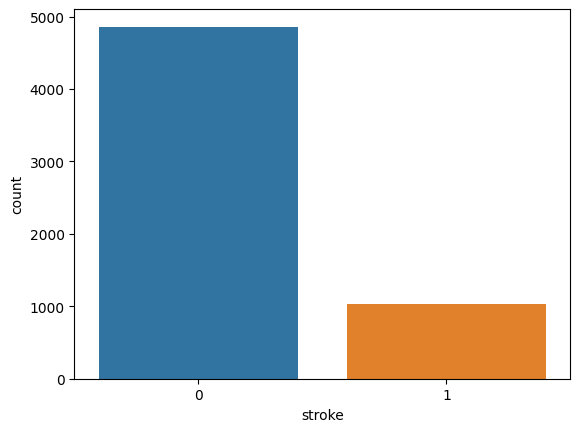

In [39]:
# Plot Target variable distribution in Seaborn

import seaborn as sns

sns.countplot(x='stroke', data=df)

In [16]:
# Drop 'id' column if it exists

df.drop('id', axis=1, inplace=True, errors='ignore')

In [40]:
df.head()

age  hypertension  heart_disease  avg_glucose_level           bmi  \
0  0.884708             0              1           2.482412  1.016106e+00   
1  0.625297             0              0           1.932005 -9.726624e-16   
2  1.446765             0              1          -0.069455  4.675000e-01   
3  0.106475             0              0           1.288062  7.217319e-01   
4  1.403529             1              0           1.348133 -6.698531e-01   

   stroke  gender_Male  gender_Other  ever_married_Yes  \
0       1            1             0                 1   
1       1            0             0                 1   
2       1            1             0                 1   
3       1            0             0                 1   
4       1            0             0                 1   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                       0                  1                        0   
1                       0                  0                        1   
2                       0                  1                        0   
3                       0                  1                        0   
4                       0                  0                        1   

   work_type_children  Residence_type_Urban  smoking_status_formerly smoked  \
0                   0                     1                               1   
1                   0                     0                               0   
2                   0                     0                               0   
3                   0                     1                               0   
4                   0                     0                               0   

   smoking_status_never smoked  smoking_status_smokes  
0                            0                      0  
1                            1                      0  
2                            1                      0  
3                            0                      1  
4                            1                      0

In [41]:
# Split data into features (X) and target variable (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

In [42]:
X

age  hypertension  heart_disease  avg_glucose_level           bmi  \
0     0.884708             0              1           2.482412  1.016106e+00   
1     0.625297             0              0           1.932005 -9.726624e-16   
2     1.446765             0              1          -0.069455  4.675000e-01   
3     0.106475             0              0           1.288062  7.217319e-01   
4     1.403529             1              0           1.348133 -6.698531e-01   
...        ...           ...            ...                ...           ...   
5888  0.409121             0              0          -0.540252  5.210225e-01   
5889  0.971178             0              0          -0.247381 -1.346281e-01   
5890  1.446765             0              0          -0.693235 -3.085762e-01   
5891  0.668532             1              1          -0.650417  3.336938e-01   
5892  1.273824             0              0          -0.181075 -9.726624e-16   

      gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
0               1             0                 1                       0   
1               0             0                 1                       0   
2               1             0                 1                       0   
3               0             0                 1                       0   
4               0             0                 1                       0   
...           ...           ...               ...                     ...   
5888            0             0                 1                       0   
5889            1             0                 1                       0   
5890            0             0                 1                       0   
5891            1             0                 1                       0   
5892            0             0                 0                       0   

      work_type_Private  work_type_Self-employed  work_type_children  \
0                     1                        0                   0   
1                     0                        1                   0   
2                     1                        0                   0   
3                     1                        0                   0   
4                     0                        1                   0   
...                 ...                      ...                 ...   
5888                  1                        0                   0   
5889                  0                        1                   0   
5890                  0                        1                   0   
5891                  1                        0                   0   
5892                  1                        0                   0   

      Residence_type_Urban  smoking_status_formerly smoked  \
0                        1                               1   
1                        0                               0   
2                        0                               0   
3                        1                               0   
4                        0                               0   
...                    ...                             ...   
5888                     0                               0   
5889                     0                               0   
5890                     1                               0   
5891                     0                               1   
5892                     0                               0   

      smoking_status_never smoked  smoking_status_smokes  
0                               0                      0  
1                               1                      0  
2                               1                      0  
3                               0                      1  
4                               1                      0  
...                           ...                    ...  
5888                            0                      1  
5889                            0          

In [43]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5888    1
5889    1
5890    1
5891    1
5892    1
Name: stroke, Length: 5893, dtype: int64

In [44]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [45]:
X_train.value_counts()

age        hypertension  heart_disease  avg_glucose_level  bmi            gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  work_type_Private  work_type_Self-employed  work_type_children  Residence_type_Urban  smoking_status_formerly smoked  smoking_status_never smoked  smoking_status_smokes
 1.533235  1             1               2.217393          -1.480087e-01  0            0             1                 0                       0                  0                        0                   1                     1                               0                            0                        2
 0.798237  0             0               2.006002           2.273884e+00  0            0             1                 0                       1                  0                        0                   1                     1                               0                            0                        2
 1.273824  0             0              -0.059270     

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the models
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
kneighbors_classifier = KNeighborsClassifier()
naive_bayes = GaussianNB()
svm = SVC()
gradient_boosting = GradientBoostingClassifier()


# Train the models
logistic_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
kneighbors_classifier.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)
svm.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)


# Make predictions on the test set
lr_predictions = logistic_regression.predict(X_test)
dt_predictions = decision_tree.predict(X_test)
rf_predictions = random_forest.predict(X_test)
kc_predictions = kneighbors_classifier.predict(X_test)
nb_y_pred = naive_bayes.predict(X_test)
svm_y_pred = svm.predict(X_test)
gb_y_pred = gradient_boosting.predict(X_test)



In [49]:
# Evaluate model performance
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)

dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

kc_accuracy = accuracy_score(y_test, kc_predictions)
kc_precision = precision_score(y_test, kc_predictions)
kc_recall = recall_score(y_test, kc_predictions)
kc_f1 = f1_score(y_test, kc_predictions)

nb_accuracy = accuracy_score(y_test, nb_y_pred)
nb_precision = precision_score(y_test, nb_y_pred)
nb_recall = recall_score(y_test, nb_y_pred)
nb_f1 = f1_score(y_test, nb_y_pred)

svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_precision = precision_score(y_test, svm_y_pred)
svm_recall = recall_score(y_test, svm_y_pred)
svm_f1 = f1_score(y_test, svm_y_pred)

gb_accuracy = accuracy_score(y_test, gb_y_pred)
gb_precision = precision_score(y_test, gb_y_pred)
gb_recall = recall_score(y_test, gb_y_pred)
gb_f1 = f1_score(y_test, gb_y_pred)


# Print the evaluation metrics
print("Logistic Regression:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1)

print("\n\nDecision Tree:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 Score:", dt_f1)

print("\n\nRandom Forest:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)

print("\n\nK Neighbors Classifier:")
print("Accuracy:", kc_accuracy)
print("Precision:", kc_precision)
print("Recall:", kc_recall)
print("F1 Score:", kc_f1)

print('\n\nNaive Bayes Results:')
print('Accuracy:', nb_accuracy)
print('Precision:', nb_precision)
print('Recall:', nb_recall)
print('F1-score:', nb_f1)
print('\n')

print('SVM Results:')
print('Accuracy:', svm_accuracy)
print('Precision:', svm_precision)
print('Recall:', svm_recall)
print('F1-score:', svm_f1)
print('\n')

print('Gradient Boosting Results:')
print('Accuracy:', gb_accuracy)
print('Precision:', gb_precision)
print('Recall:', gb_recall)
print('F1-score:', gb_f1)
print('\n')

Logistic Regression:
Accuracy: 0.7844752818733738
Precision: 0.7637407711238721
Recall: 0.8166666666666667
F1 Score: 0.7893175074183977


Decision Tree:
Accuracy: 0.8352124891587164
Precision: 0.8204047217537943
Recall: 0.8535087719298246
F1 Score: 0.8366294067067928


Random Forest:
Accuracy: 0.8764093668690373
Precision: 0.8444802578565673
Recall: 0.9192982456140351
F1 Score: 0.880302393952121


K Neighbors Classifier:
Accuracy: 0.836947094535993
Precision: 0.7817109144542773
Recall: 0.9298245614035088
F1 Score: 0.8493589743589743


Naive Bayes Results:
Accuracy: 0.5732870771899393
Precision: 0.5367924528301887
Recall: 0.9982456140350877
F1-score: 0.6981595092024541


SVM Results:
Accuracy: 0.8117953165654813
Precision: 0.7736434108527132
Recall: 0.875438596491228
F1-score: 0.8213991769547325


Gradient Boosting Results:
Accuracy: 0.8243712055507372
Precision: 0.7966101694915254
Recall: 0.8657894736842106
F1-score: 0.8297604035308953




In [50]:
# Save Model

import pickle
with open('model_pickle.pkl','wb') as file:
    pickle.dump(decision_tree,file)

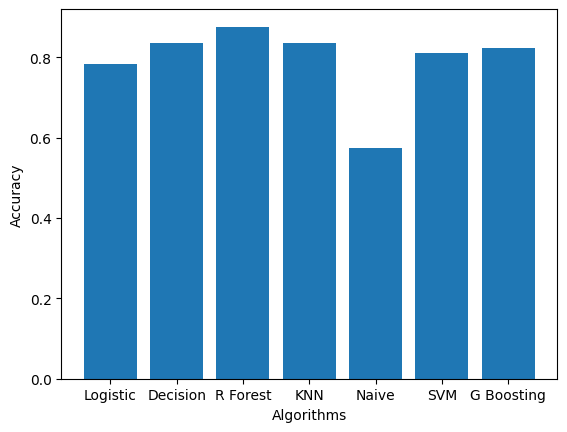

In [51]:
plt.bar(['Logistic', 'Decision','R Forest', 'KNN', 'Naive','SVM', 'G Boosting'],[lr_accuracy,dt_accuracy,rf_accuracy,kc_accuracy,nb_accuracy, svm_accuracy, gb_accuracy ])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

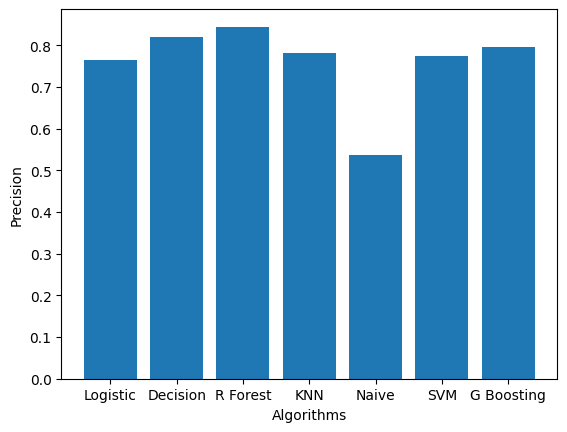

In [52]:
plt.bar(['Logistic', 'Decision','R Forest', 'KNN', 'Naive','SVM', 'G Boosting'],[lr_precision,dt_precision,rf_precision,kc_precision,nb_precision, svm_precision, gb_precision])
plt.xlabel("Algorithms")
plt.ylabel("Precision")
plt.show()

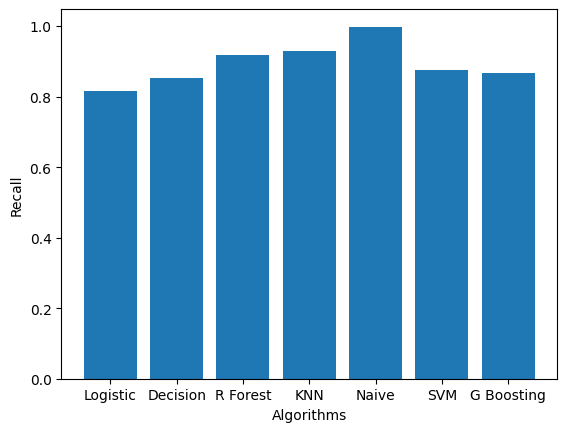

In [53]:
plt.bar(['Logistic', 'Decision','R Forest', 'KNN', 'Naive','SVM', 'G Boosting'],[lr_recall,dt_recall,rf_recall,kc_recall,nb_recall, svm_recall, gb_recall ])
plt.xlabel("Algorithms")
plt.ylabel("Recall")
plt.show()

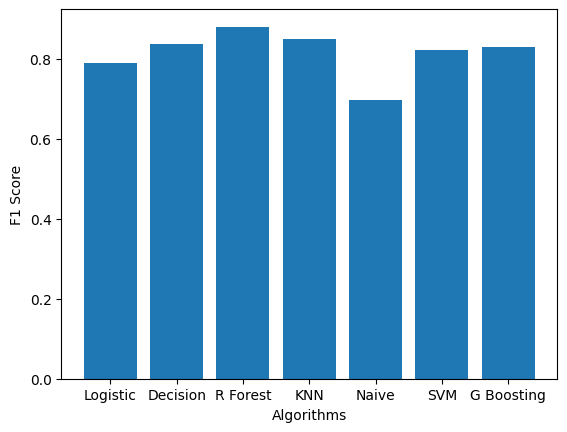

In [54]:
plt.bar(['Logistic', 'Decision','R Forest', 'KNN', 'Naive','SVM', 'G Boosting'],[lr_f1,dt_f1,rf_f1,kc_f1,nb_f1, svm_f1, gb_f1 ])
plt.xlabel("Algorithms")
plt.ylabel("F1 Score")
plt.show()